In [43]:
import pandas as pd
import os
import scipy.stats
import matplotlib.pyplot as plt
import math
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score,  mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [4]:
list_files = os.listdir()
files_to_analyse = []

for file in list_files:
    if file.startswith(('A', 'B', 'C', 'D', 'E')) and file.endswith('.csv'):
        files_to_analyse.append(file)

data_frames = []
for csv_file in files_to_analyse:
        df = pd.read_csv(csv_file, encoding='Windows-1250', sep=';', low_memory=False)
        data_frames.append(df)
df = pd.concat(data_frames)
df

,ID_stacji,Parametr,Data_godzina,Wartość
0,538.0,A,01.07.2022 00:00,"16,6"
1,538.0,A,01.07.2022 01:00,15
2,538.0,A,01.07.2022 02:00,"15,2"
3,538.0,A,01.07.2022 03:00,"13,9"
4,538.0,A,01.07.2022 04:00,"16,1"
...,...,...,...,...
1035968,560.0,C,30.06.2022 19:00,"1,5"
1035969,560.0,C,30.06.2022 20:00,"0,9"
1035970,560.0,C,30.06.2022 21:00,"1,2"
1035971,560.0,C,30.06.2022 22:00,"1,6"


In [5]:
df = df.dropna(subset=['Parametr'])
df['Parametr'] = df['Parametr'].str.strip()
df['Data_godzina'] = pd.to_datetime(df['Data_godzina'], format="%d.%m.%Y %H:%M")
df['ID_stacji'] = pd.to_numeric(df['ID_stacji'], downcast='integer')
df['Wartość'] = df['Wartość'].str.replace(',', '.')
df['Wartość'] = pd.to_numeric(df['Wartość'])

In [6]:
min_df = df['Wartość'].min()
max_df = df['Wartość'].max()
mean_df = df['Wartość'].mean()
print("Minimum value in this dataframe is: {}, maximum value is: {} and mean is: {}.".format(min_df, max_df, mean_df))

Minimum value in this dataframe is: -49.3, maximum value is: 1000.9 and mean is: 24.265545016112824.


In [7]:
min_id = df['ID_stacji'].min()
max_id = df['ID_stacji'].max()
print('Min ID_stacji: {}, max ID_stacji: {}.'.format(min_id, max_id))

Min ID_stacji: 1, max ID_stacji: 570.


In [8]:
def get_station_measurments(df, ID):
    filtred_df = df[df['ID_stacji'] == ID]
    return filtred_df

def get_station_specific_measurments(df, ID, parameter):
    filtred_df = df[(df['ID_stacji'] == ID) & (df['Parametr'] == parameter)]
    return filtred_df

In [9]:
#just check this function output
get_station_specific_measurments(df,2, 'A')

,ID_stacji,Parametr,Data_godzina,Wartość
135392,2,A,2022-07-01 00:00:00,18.8
135393,2,A,2022-07-01 01:00:00,16.9
135394,2,A,2022-07-01 02:00:00,18.0
135395,2,A,2022-07-01 03:00:00,15.8
135396,2,A,2022-07-01 04:00:00,17.8
...,...,...,...,...
983093,2,A,2017-06-30 19:00:00,19.3
983094,2,A,2017-06-30 20:00:00,18.5
983095,2,A,2017-06-30 21:00:00,17.9
983096,2,A,2017-06-30 22:00:00,17.2


In [10]:
get_station_specific_measurments(df,1, 'A')

,ID_stacji,Parametr,Data_godzina,Wartość


In [11]:
A_mean = df[df['Parametr'] == 'A'].groupby(["ID_stacji"]).mean()
B_mean = df[df['Parametr'] == 'B'].groupby(["ID_stacji"]).mean()
C_mean = df[df['Parametr'] == 'C'].groupby(["ID_stacji"]).mean()
D_mean = df[df['Parametr'] == 'D'].groupby(["ID_stacji"]).mean()
E_mean = df[df['Parametr'] == 'A'].groupby(["ID_stacji"]).mean()

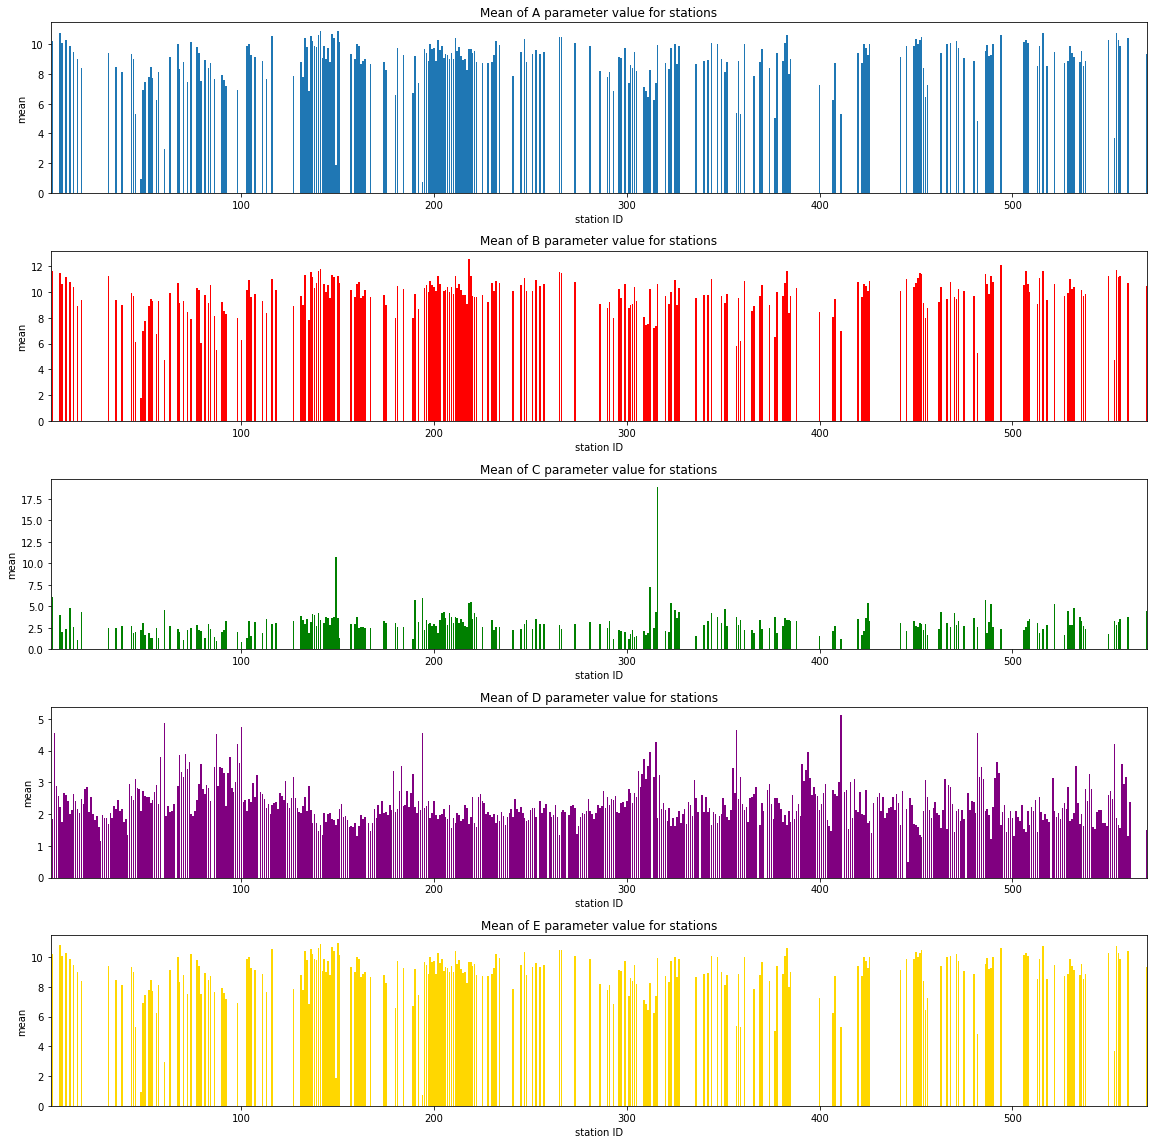

In [12]:
A_mean_val = A_mean.values.tolist()
A_mean_val_flat = [a[0] for a in A_mean_val]
A_mean_index = A_mean.index.tolist()

B_mean_val = B_mean.values.tolist()
B_mean_val_flat = [a[0] for a in B_mean_val]
B_mean_index = B_mean.index.tolist()

C_mean_val = C_mean.values.tolist()
C_mean_val_flat = [a[0] for a in C_mean_val]
C_mean_index = C_mean.index.tolist()

D_mean_val = D_mean.values.tolist()
D_mean_val_flat = [a[0] for a in D_mean_val]
D_mean_index = D_mean.index.tolist()

E_mean_val = E_mean.values.tolist()
E_mean_val_flat = [a[0] for a in E_mean_val]
E_mean_index = E_mean.index.tolist()

fig, axs = plt.subplots(5,1, figsize=(16, 16))

axs[0].bar(A_mean_index, A_mean_val_flat)
axs[0].set_title('Mean of A parameter value for stations')
axs[0].set_xlabel('station ID')
axs[0].set_ylabel('mean')
axs[0].set_xlim([min_id, max_id])

axs[1].bar(B_mean_index, B_mean_val_flat, color = 'red')
axs[1].set_title('Mean of B parameter value for stations')
axs[1].set_xlabel('station ID')
axs[1].set_ylabel('mean')
axs[1].set_xlim([min_id, max_id])

axs[2].bar(C_mean_index, C_mean_val_flat, color = 'green')
axs[2].set_title('Mean of C parameter value for stations')
axs[2].set_xlabel('station ID')
axs[2].set_ylabel('mean')
axs[2].set_xlim([min_id, max_id])

axs[3].bar(D_mean_index, D_mean_val_flat, color = 'purple')
axs[3].set_title('Mean of D parameter value for stations')
axs[3].set_xlabel('station ID')
axs[3].set_ylabel('mean')
axs[3].set_xlim([min_id, max_id])

axs[4].bar(E_mean_index, E_mean_val_flat, color = 'gold')
axs[4].set_title('Mean of E parameter value for stations')
axs[4].set_xlabel('station ID')
axs[4].set_ylabel('mean')
axs[4].set_xlim([min_id, max_id])


plt.tight_layout()

plt.show()

from this 5 plots: the largest number of stations have data on the D parameter

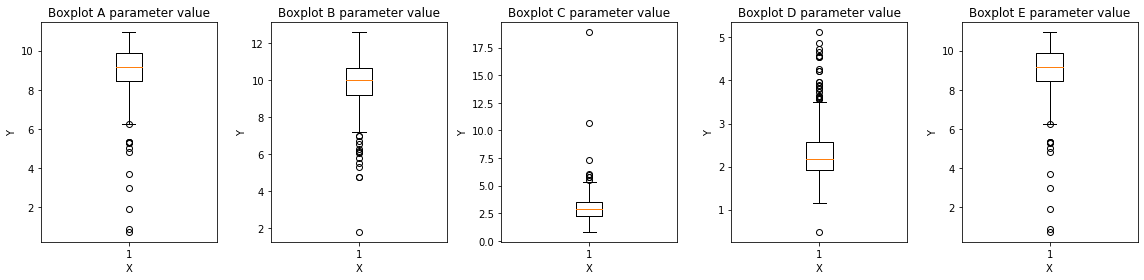

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

axs[0].boxplot(A_mean_val_flat)
axs[0].set_title('Boxplot A parameter value')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Wykres typu boxplot na drugim obiekcie klasy axis
axs[1].boxplot(B_mean_val_flat)
axs[1].set_title('Boxplot B parameter value')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# Wykres typu boxplot na trzecim obiekcie klasy axis
axs[2].boxplot(C_mean_val_flat)
axs[2].set_title('Boxplot C parameter value')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')

axs[3].boxplot(D_mean_val_flat)
axs[3].set_title('Boxplot D parameter value')
axs[3].set_xlabel('X')
axs[3].set_ylabel('Y')


axs[4].boxplot(E_mean_val_flat)
axs[4].set_title('Boxplot E parameter value')
axs[4].set_xlabel('X')
axs[4].set_ylabel('Y')

plt.tight_layout()
plt.show()


In [14]:
A = df[df['Parametr'] == 'A'].groupby(["ID_stacji"])
A_IQR = df[df['Parametr'] == 'A']['Wartość'].quantile(0.75) - df[df['Parametr'] == 'A']['Wartość'].quantile(0.25)
A_Q1 = df[df['Parametr'] == 'A']['Wartość'].quantile(0.25)
A_Q3 = df[df['Parametr'] == 'A']['Wartość'].quantile(0.75)
A_min = df[df['Parametr'] == 'A']['Wartość'].min()
A_max = df[df['Parametr'] == 'A']['Wartość'].max()
A_mean = df[df['Parametr'] == 'A']['Wartość'].mean()
A_median = df[df['Parametr'] == 'A']['Wartość'].median()
A_lower_whisker = A_Q1 - (A_IQR*1.5)
A_upper_whisker = A_Q3 + (A_IQR*1.5)

B = df[df['Parametr'] == 'B'].groupby(["ID_stacji"])
B_IQR = df[df['Parametr'] == 'B']['Wartość'].quantile(0.75) - df[df['Parametr'] == 'B']['Wartość'].quantile(0.25)
B_Q1 = df[df['Parametr'] == 'B']['Wartość'].quantile(0.25)
B_Q3 = df[df['Parametr'] == 'B']['Wartość'].quantile(0.75)
B_min = df[df['Parametr'] == 'B']['Wartość'].min()
B_max = df[df['Parametr'] == 'B']['Wartość'].max()
B_mean = df[df['Parametr'] == 'B']['Wartość'].mean()
B_median = df[df['Parametr'] == 'B']['Wartość'].median()
B_lower_whisker = B_Q1 - (B_IQR*1.5)
B_upper_whisker = B_Q3 + (B_IQR*1.5)

C = df[df['Parametr'] == 'C'].groupby(["ID_stacji"])
C_IQR = df[df['Parametr'] == 'C']['Wartość'].quantile(0.75) - df[df['Parametr'] == 'C']['Wartość'].quantile(0.25)
C_Q1 = df[df['Parametr'] == 'C']['Wartość'].quantile(0.25)
C_Q3 = df[df['Parametr'] == 'C']['Wartość'].quantile(0.75)
C_min = df[df['Parametr'] == 'C']['Wartość'].min()
C_max = df[df['Parametr'] == 'C']['Wartość'].max()
C_mean = df[df['Parametr'] == 'C']['Wartość'].mean()
C_median = df[df['Parametr'] == 'C']['Wartość'].median()
C_lower_whisker = C_Q1 - (C_IQR*1.5)
C_upper_whisker = C_Q3 + (C_IQR*1.5)

D = df[df['Parametr'] == 'D'].groupby(["ID_stacji"])
D_IQR = df[df['Parametr'] == 'D']['Wartość'].quantile(0.75) - df[df['Parametr'] == 'D']['Wartość'].quantile(0.25)
D_Q1 = df[df['Parametr'] == 'D']['Wartość'].quantile(0.25)
D_Q3 = df[df['Parametr'] == 'D']['Wartość'].quantile(0.75)
D_min = df[df['Parametr'] == 'D']['Wartość'].min()
D_max = df[df['Parametr'] == 'D']['Wartość'].max()
D_mean = df[df['Parametr'] == 'D']['Wartość'].mean()
D_median = df[df['Parametr'] == 'D']['Wartość'].median()
D_lower_whisker = D_Q1 - (D_IQR*1.5)
D_upper_whisker = D_Q3 + (D_IQR*1.5)

E = df[df['Parametr'] == 'E'].groupby(["ID_stacji"])
E_IQR = df[df['Parametr'] == 'E']['Wartość'].quantile(0.75) - df[df['Parametr'] == 'E']['Wartość'].quantile(0.25)
E_Q1 = df[df['Parametr'] == 'E']['Wartość'].quantile(0.25)
E_Q3 = df[df['Parametr'] == 'E']['Wartość'].quantile(0.75)
E_min = df[df['Parametr'] == 'E']['Wartość'].min()
E_max = df[df['Parametr'] == 'E']['Wartość'].max()
E_mean = df[df['Parametr'] == 'E']['Wartość'].mean()
E_median = df[df['Parametr'] == 'E']['Wartość'].median()
E_lower_whisker = E_Q1 - (E_IQR*1.5)
E_upper_whisker = E_Q3 + (E_IQR*1.5)

In [15]:
print("""Summary statistics\n\nA parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {}, \nboxplot whiskers lower: {}, upper: {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nB parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {}, \nboxplot whiskers lower: {}, upper: {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nC parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {}, \nboxplot whiskers lower: {}, upper: {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nD parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {}, \nboxplot whiskers lower: {}, upper: {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nE parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {}, \nboxplot whiskers lower: {}, upper: {},\nmin: {}, max: {}, mean: {}, median: {}.""".format(A_Q1, A_Q3, A_IQR, A_lower_whisker, A_upper_whisker, A_min, A_max, A_mean, A_median,
                 B_Q1, B_Q3, B_IQR, B_lower_whisker, B_upper_whisker, B_min, B_max, B_mean, B_median,
                 C_Q1, C_Q3, C_IQR, C_lower_whisker, C_upper_whisker, C_min, C_max, C_mean, C_median,
                 D_Q1, D_Q3, D_IQR, D_lower_whisker, D_upper_whisker, D_min, D_max, D_mean, D_median,
                 E_Q1, E_Q3, E_IQR, E_lower_whisker, E_upper_whisker, E_min, E_max, E_mean, E_median,))


Summary statistics

A parameter:
1st quantile 2.0, 3rd quantile: 15.16, interquartile range 13.16, 
boxplot whiskers lower: -17.740000000000002, upper: 34.900000000000006,
min: -23.4, max: 50.46, mean: 8.908424842097661, median: 8.6

    
B parameter:
1st quantile 2.0, 3rd quantile: 16.2, interquartile range 14.2, 
boxplot whiskers lower: -19.299999999999997, upper: 37.5,
min: -49.3, max: 56.6, mean: 9.774159544228995, median: 8.8

    
C parameter:
1st quantile 1.4, 3rd quantile: 4.0, interquartile range 2.6, 
boxplot whiskers lower: -2.5000000000000004, upper: 7.9,
min: 0.0, max: 1000.9, mean: 3.034255279134723, median: 2.5

    
D parameter:
1st quantile 0.4, 3rd quantile: 1.9, interquartile range 1.5, 
boxplot whiskers lower: -1.85, upper: 4.15,
min: 0.0, max: 131.1, mean: 2.303026280055987, median: 0.8

    
E parameter:
1st quantile 64.81, 3rd quantile: 93.0, interquartile range 28.189999999999998, 
boxplot whiskers lower: 22.525000000000006, upper: 135.285,
min: -10.0, max: 114.

E parameter is relative air humidity. By definition it cannot be greater than 100% and less than 0%. In next step I'll correct this data. The same with C parameter (averade qind speed). The highest recorded wind speed in the world is 330 km/h. In order not to ignore a potential anomaly I will only discard all results greater than 450 km/h.

In [16]:
A_without_outliers = df[(df['Parametr'] == 'A') & ((df['Wartość'] <= A_upper_whisker) & (df['Wartość'] >= A_lower_whisker))]
B_without_outliers = df[(df['Parametr'] == 'B') & ((df['Wartość'] <= B_upper_whisker) & (df['Wartość'] >= B_lower_whisker))]
C_without_outliers = df[(df['Parametr'] == 'C') & ((df['Wartość'] <= C_upper_whisker) & (df['Wartość'] >= 0))]
D_without_outliers = df[(df['Parametr'] == 'D') & ((df['Wartość'] <= D_upper_whisker) & (df['Wartość'] >= 0))]
E_without_outliers = df[(df['Parametr'] == 'E') & ((df['Wartość'] <= 100) & (df['Wartość'] > E_lower_whisker))]

In [17]:
sum_without_outliers = A_without_outliers.shape[0] + B_without_outliers.shape[0] + C_without_outliers.shape[0] + D_without_outliers.shape[0] + E_without_outliers.shape[0] 
percentage = 1-(sum_without_outliers/df.shape[0])
print(f"Outliers are {percentage:.2f} % of all dataframe")

Outliers are 0.03 % of all dataframe


In [18]:
A_IQR_corrected = A_without_outliers['Wartość'].quantile(0.75) - A_without_outliers['Wartość'].quantile(0.25)
A_Q1_corrected = A_without_outliers['Wartość'].quantile(0.25)
A_Q3_corrected = A_without_outliers['Wartość'].quantile(0.75)
A_min_corrected = A_without_outliers['Wartość'].min()
A_max_corrected = A_without_outliers['Wartość'].max()
A_mean_corrected = A_without_outliers['Wartość'].mean()
A_median_corrected = A_without_outliers['Wartość'].median()

B_IQR_corrected = B_without_outliers['Wartość'].quantile(0.75) - B_without_outliers['Wartość'].quantile(0.25)
B_Q1_corrected = B_without_outliers['Wartość'].quantile(0.25)
B_Q3_corrected = B_without_outliers['Wartość'].quantile(0.75)
B_min_corrected = B_without_outliers['Wartość'].min()
B_max_corrected = B_without_outliers['Wartość'].max()
B_mean_corrected = B_without_outliers['Wartość'].mean()
B_median_corrected = B_without_outliers['Wartość'].median()

C_IQR_corrected = C_without_outliers['Wartość'].quantile(0.75) - C_without_outliers['Wartość'].quantile(0.25)
C_Q1_corrected = C_without_outliers['Wartość'].quantile(0.25)
C_Q3_corrected = C_without_outliers['Wartość'].quantile(0.75)
C_min_corrected = C_without_outliers['Wartość'].min()
C_max_corrected = C_without_outliers['Wartość'].max()
C_mean_corrected = C_without_outliers['Wartość'].mean()
C_median_corrected = C_without_outliers['Wartość'].median()

D_IQR_corrected = D_without_outliers['Wartość'].quantile(0.75) - D_without_outliers['Wartość'].quantile(0.25)
D_Q1_corrected = D_without_outliers['Wartość'].quantile(0.25)
D_Q3_corrected = D_without_outliers['Wartość'].quantile(0.75)
D_min_corrected = D_without_outliers['Wartość'].min()
D_max_corrected = D_without_outliers['Wartość'].max()
D_mean_corrected = D_without_outliers['Wartość'].mean()
D_median_corrected = D_without_outliers['Wartość'].median()

E_IQR_corrected = E_without_outliers['Wartość'].quantile(0.75) - E_without_outliers['Wartość'].quantile(0.25)
E_Q1_corrected = E_without_outliers['Wartość'].quantile(0.25)
E_Q3_corrected = E_without_outliers['Wartość'].quantile(0.75)
E_min_corrected = E_without_outliers['Wartość'].min()
E_max_corrected = E_without_outliers['Wartość'].max()
E_mean_corrected = E_without_outliers['Wartość'].mean()
E_median_corrected = E_without_outliers['Wartość'].median()

In [19]:
print("""Summary statistics corrected\n\nA parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nB parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nC parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nD parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {},\nmin: {}, max: {}, mean: {}, median: {}\n
    \nE parameter:\n1st quantile {}, 3rd quantile: {}, interquartile range {},\nmin: {}, max: {}, mean: {}, median: {}.""".format(A_Q1_corrected, A_Q3_corrected, A_IQR_corrected, A_min_corrected, A_max_corrected, A_mean_corrected, A_median_corrected,
                B_Q1_corrected, B_Q3_corrected, B_IQR_corrected, B_min_corrected, B_max_corrected, B_mean_corrected, B_median_corrected,
                C_Q1_corrected, C_Q3_corrected, C_IQR_corrected, C_min_corrected, C_max_corrected, C_mean_corrected, C_median_corrected,
                D_Q1_corrected, D_Q3_corrected, D_IQR_corrected, D_min_corrected, D_max_corrected, D_mean_corrected, D_median_corrected,
                E_Q1_corrected, E_Q3_corrected, E_IQR_corrected, E_min_corrected, E_max_corrected, E_mean_corrected, E_median_corrected))

Summary statistics corrected

A parameter:
1st quantile 2.0, 3rd quantile: 15.15, interquartile range 13.15,
min: -17.74, max: 34.9, mean: 8.903640608223482, median: 8.6

    
B parameter:
1st quantile 2.0, 3rd quantile: 16.1, interquartile range 14.100000000000001,
min: -19.2, max: 37.5, mean: 9.701022883932849, median: 8.8

    
C parameter:
1st quantile 1.3, 3rd quantile: 3.8, interquartile range 2.5,
min: 0.0, max: 7.9, mean: 2.726559789408194, median: 2.5

    
D parameter:
1st quantile 0.4, 3rd quantile: 1.0, interquartile range 0.6,
min: 0.0, max: 4.1, mean: 0.9066551832803528, median: 0.7

    
E parameter:
1st quantile 63.78, 3rd quantile: 91.32, interquartile range 27.539999999999992,
min: 22.53, max: 100.0, mean: 75.89841987306485, median: 81.0.


In [20]:
A_without_outliers_2017= A_without_outliers[A_without_outliers['Data_godzina'].dt.year == 2017] 
A_without_outliers_2017jan = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 1]
A_without_outliers_2017feb = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 2]
A_without_outliers_2017mar = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 3]
A_without_outliers_2017apr = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 4]
A_without_outliers_2017may = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 5]
A_without_outliers_2017jun = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 6]
A_without_outliers_2017jul = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 7]
A_without_outliers_2017aug = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 8]
A_without_outliers_2017sep = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 9]
A_without_outliers_2017oct = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 10]
A_without_outliers_2017nov = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 11]
A_without_outliers_2017dec = A_without_outliers_2017[A_without_outliers_2017['Data_godzina'].dt.month == 12]

A_without_outliers_2022= A_without_outliers[A_without_outliers['Data_godzina'].dt.year == 2022] 
A_without_outliers_2022jan = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 1]
A_without_outliers_2022feb = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 2]
A_without_outliers_2022mar = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 3]
A_without_outliers_2022apr = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 4]
A_without_outliers_2022may = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 5]
A_without_outliers_2022jun = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 6]
A_without_outliers_2022jul = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 7]
A_without_outliers_2022aug = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 8]
A_without_outliers_2022sep = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 9]
A_without_outliers_2022oct = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 10]
A_without_outliers_2022nov = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 11]
A_without_outliers_2022dec = A_without_outliers_2022[A_without_outliers_2022['Data_godzina'].dt.month == 12]

In [21]:
daily_groups_2017jan = A_without_outliers_2017jan.groupby(A_without_outliers_2017jan['Data_godzina'].dt.date)
daily_mean_2017jan = daily_groups_2017jan['Wartość'].mean()
daily_groups_2017feb = A_without_outliers_2017feb.groupby(A_without_outliers_2017feb['Data_godzina'].dt.date)
daily_mean_2017feb = daily_groups_2017feb['Wartość'].mean()
daily_groups_2017mar = A_without_outliers_2017mar.groupby(A_without_outliers_2017mar['Data_godzina'].dt.date)
daily_mean_2017mar = daily_groups_2017mar['Wartość'].mean()
daily_groups_2017apr = A_without_outliers_2017apr.groupby(A_without_outliers_2017apr['Data_godzina'].dt.date)
daily_mean_2017apr = daily_groups_2017apr['Wartość'].mean()
daily_groups_2017may = A_without_outliers_2017may.groupby(A_without_outliers_2017may['Data_godzina'].dt.date)
daily_mean_2017may = daily_groups_2017may['Wartość'].mean()
daily_groups_2017jun = A_without_outliers_2017jun.groupby(A_without_outliers_2017jun['Data_godzina'].dt.date)
daily_mean_2017jun = daily_groups_2017jun['Wartość'].mean()
daily_groups_2017jul = A_without_outliers_2017jul.groupby(A_without_outliers_2017jul['Data_godzina'].dt.date)
daily_mean_2017jul = daily_groups_2017jul['Wartość'].mean()
daily_groups_2017aug = A_without_outliers_2017aug.groupby(A_without_outliers_2017aug['Data_godzina'].dt.date)
daily_mean_2017aug = daily_groups_2017aug['Wartość'].mean()
daily_groups_2017sep = A_without_outliers_2017sep.groupby(A_without_outliers_2017sep['Data_godzina'].dt.date)
daily_mean_2017sep = daily_groups_2017sep['Wartość'].mean()
daily_groups_2017oct = A_without_outliers_2017oct.groupby(A_without_outliers_2017oct['Data_godzina'].dt.date)
daily_mean_2017oct = daily_groups_2017oct['Wartość'].mean()
daily_groups_2017nov = A_without_outliers_2017nov.groupby(A_without_outliers_2017nov['Data_godzina'].dt.date)
daily_mean_2017nov = daily_groups_2017nov['Wartość'].mean()
daily_groups_2017dec = A_without_outliers_2017dec.groupby(A_without_outliers_2017dec['Data_godzina'].dt.date)
daily_mean_2017dec = daily_groups_2017dec['Wartość'].mean()


daily_groups_2022jan = A_without_outliers_2022jan.groupby(A_without_outliers_2022jan['Data_godzina'].dt.date)
daily_mean_2022jan = daily_groups_2022jan['Wartość'].mean()
daily_groups_2022feb = A_without_outliers_2022feb.groupby(A_without_outliers_2022feb['Data_godzina'].dt.date)
daily_mean_2022feb = daily_groups_2022feb['Wartość'].mean()
daily_groups_2022mar = A_without_outliers_2022mar.groupby(A_without_outliers_2022mar['Data_godzina'].dt.date)
daily_mean_2022mar = daily_groups_2022mar['Wartość'].mean()
daily_groups_2022apr = A_without_outliers_2022apr.groupby(A_without_outliers_2022apr['Data_godzina'].dt.date)
daily_mean_2022apr = daily_groups_2022apr['Wartość'].mean()
daily_groups_2022may = A_without_outliers_2022may.groupby(A_without_outliers_2022may['Data_godzina'].dt.date)
daily_mean_2022may = daily_groups_2022may['Wartość'].mean()
daily_groups_2022jun = A_without_outliers_2022jun.groupby(A_without_outliers_2022jun['Data_godzina'].dt.date)
daily_mean_2022jun = daily_groups_2022jun['Wartość'].mean()
daily_groups_2022jul = A_without_outliers_2022jul.groupby(A_without_outliers_2022jul['Data_godzina'].dt.date)
daily_mean_2022jul = daily_groups_2022jul['Wartość'].mean()
daily_groups_2022aug = A_without_outliers_2022aug.groupby(A_without_outliers_2022aug['Data_godzina'].dt.date)
daily_mean_2022aug = daily_groups_2022aug['Wartość'].mean()
daily_groups_2022sep = A_without_outliers_2022sep.groupby(A_without_outliers_2022sep['Data_godzina'].dt.date)
daily_mean_2022sep = daily_groups_2022sep['Wartość'].mean()
daily_groups_2022oct = A_without_outliers_2022oct.groupby(A_without_outliers_2022oct['Data_godzina'].dt.date)
daily_mean_2022oct = daily_groups_2022oct['Wartość'].mean()
daily_groups_2022nov = A_without_outliers_2022nov.groupby(A_without_outliers_2022nov['Data_godzina'].dt.date)
daily_mean_2022nov = daily_groups_2022nov['Wartość'].mean()
daily_groups_2022dec = A_without_outliers_2022dec.groupby(A_without_outliers_2022dec['Data_godzina'].dt.date)
daily_mean_2022dec = daily_groups_2022dec['Wartość'].mean()

Text(0.5, 1.0, 'Average daily temperature in December 2022')

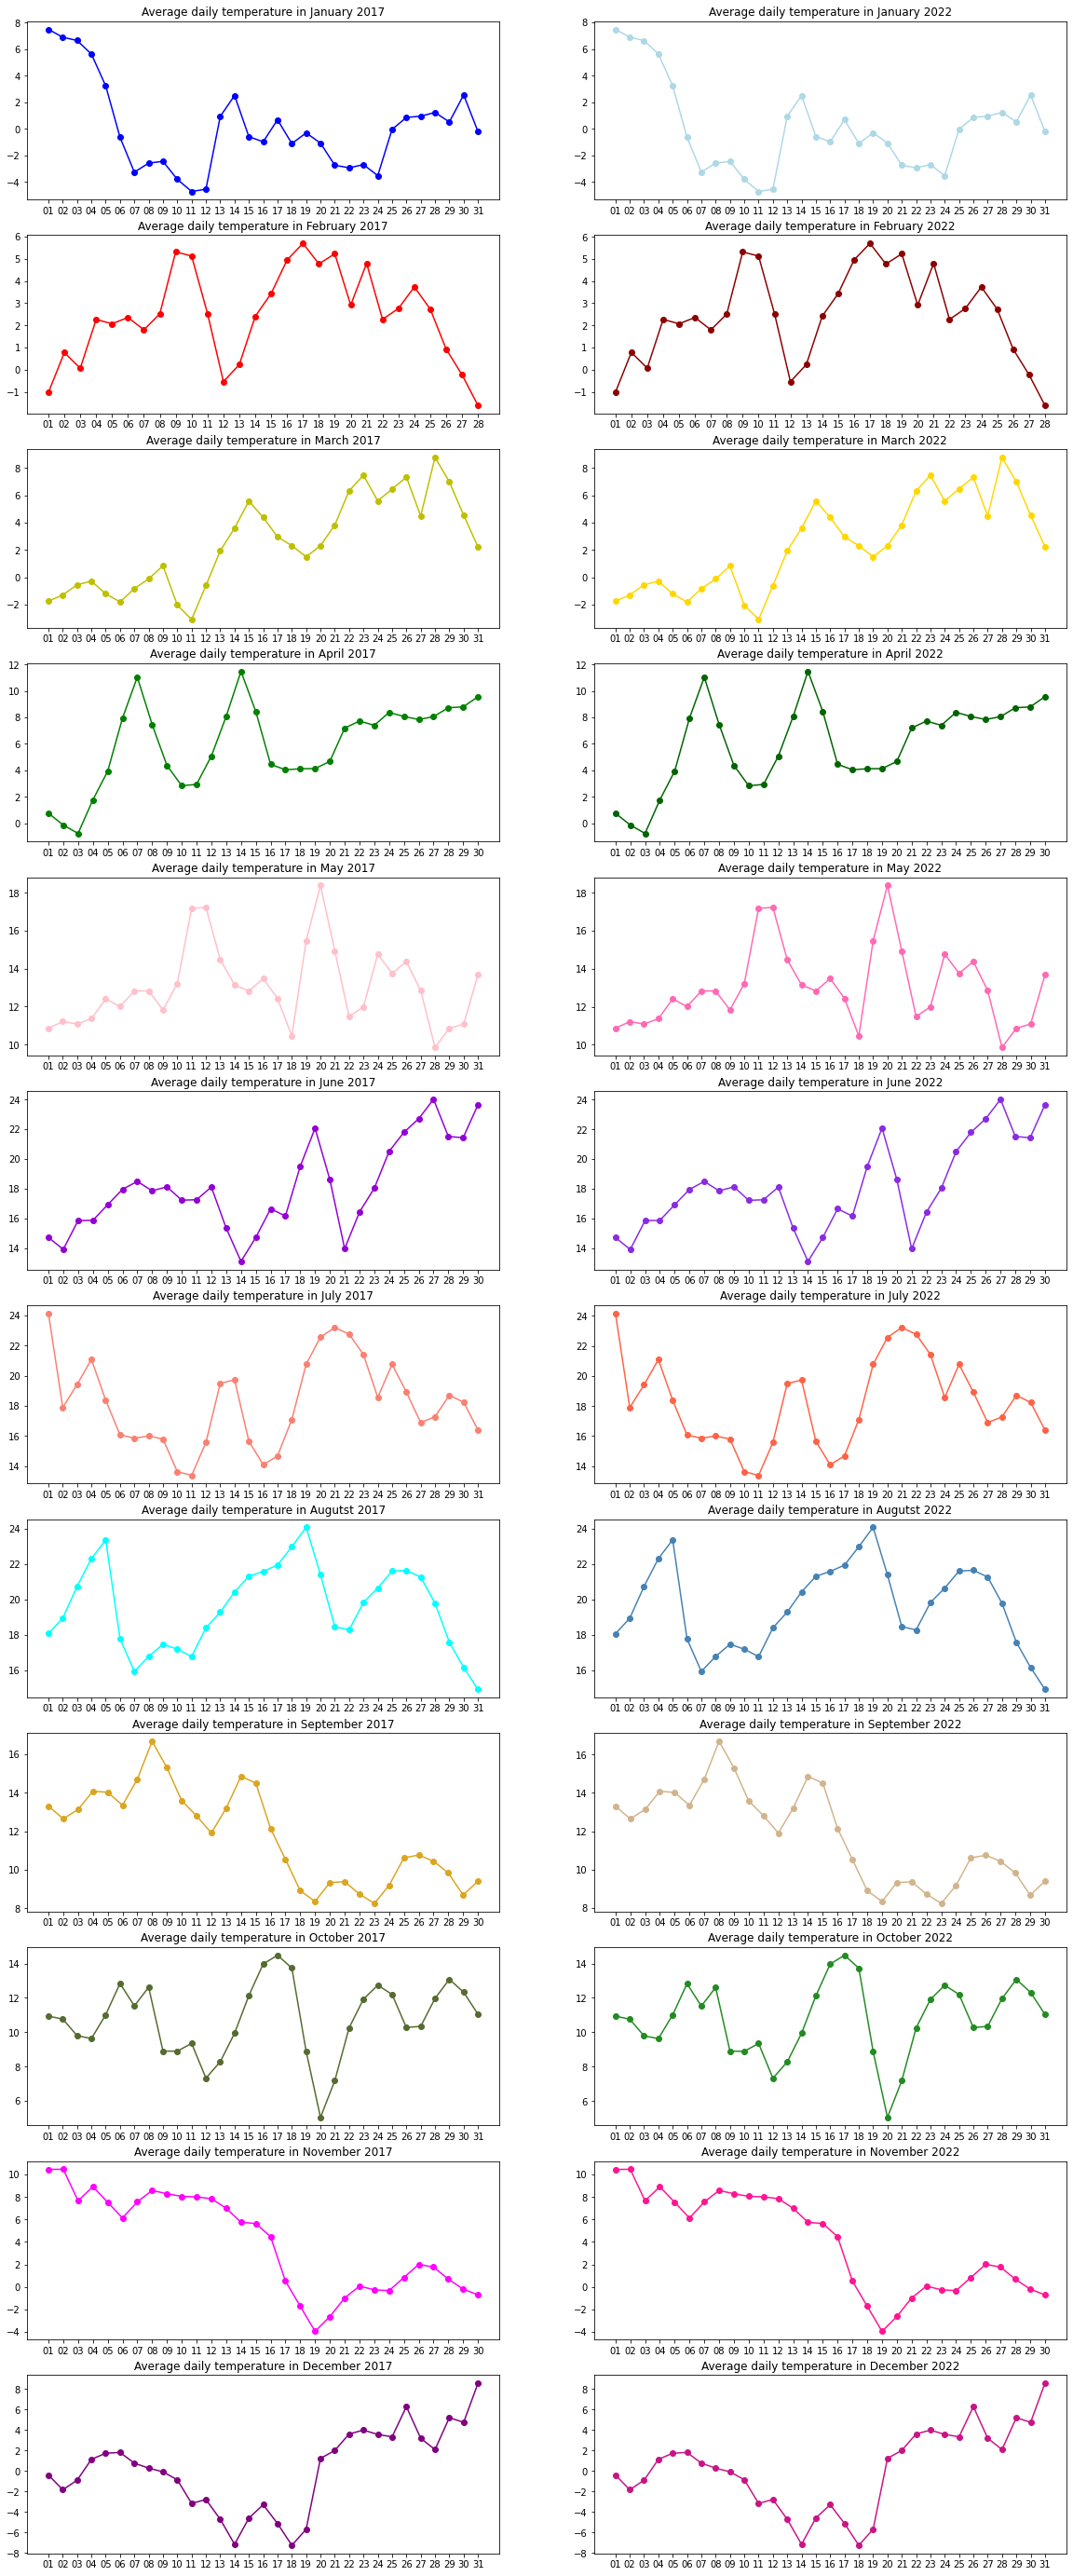

In [22]:
fig, axs = plt.subplots(12,2, figsize=(20, 50))

axs[0,0].plot(daily_mean_2017jan, marker='o', linestyle='-', color='b')
axs[0,0].set_xticks(daily_mean_2017jan.index, [date.strftime('%d') for date in daily_mean_2017jan.index])
axs[0,0].set_title('Average daily temperature in January 2017')

axs[1,0].plot(daily_mean_2017feb, marker='o', linestyle='-', color='r')
axs[1,0].set_xticks(daily_mean_2017feb.index, [date.strftime('%d') for date in daily_mean_2017feb.index])
axs[1,0].set_title('Average daily temperature in February 2017')

axs[2,0].plot(daily_mean_2017mar, marker='o', linestyle='-', color='y')
axs[2,0].set_xticks(daily_mean_2017mar.index, [date.strftime('%d') for date in daily_mean_2017mar.index])
axs[2,0].set_title('Average daily temperature in March 2017')

axs[3,0].plot(daily_mean_2017apr, marker='o', linestyle='-', color='g')
axs[3,0].set_xticks(daily_mean_2017apr.index, [date.strftime('%d') for date in daily_mean_2017apr.index])
axs[3,0].set_title('Average daily temperature in April 2017')

axs[4,0].plot(daily_mean_2017may, marker='o', linestyle='-', color='pink')
axs[4,0].set_xticks(daily_mean_2017may.index, [date.strftime('%d') for date in daily_mean_2017may.index])
axs[4,0].set_title('Average daily temperature in May 2017')

axs[5,0].plot(daily_mean_2017jun, marker='o', linestyle='-', color='darkviolet')
axs[5,0].set_xticks(daily_mean_2017jun.index, [date.strftime('%d') for date in daily_mean_2017jun.index])
axs[5,0].set_title('Average daily temperature in June 2017')

axs[6,0].plot(daily_mean_2017jul, marker='o', linestyle='-', color='salmon')
axs[6,0].set_xticks(daily_mean_2017jul.index, [date.strftime('%d') for date in daily_mean_2017jul.index])
axs[6,0].set_title('Average daily temperature in July 2017')

axs[7,0].plot(daily_mean_2017aug, marker='o', linestyle='-', color='aqua')
axs[7,0].set_xticks(daily_mean_2017aug.index, [date.strftime('%d') for date in daily_mean_2017aug.index])
axs[7,0].set_title('Average daily temperature in Augutst 2017')

axs[8,0].plot(daily_mean_2017sep, marker='o', linestyle='-', color='goldenrod')
axs[8,0].set_xticks(daily_mean_2017sep.index, [date.strftime('%d') for date in daily_mean_2017sep.index])
axs[8,0].set_title('Average daily temperature in September 2017')

axs[9,0].plot(daily_mean_2017oct, marker='o', linestyle='-', color='darkolivegreen')
axs[9,0].set_xticks(daily_mean_2017oct.index, [date.strftime('%d') for date in daily_mean_2017oct.index])
axs[9,0].set_title('Average daily temperature in October 2017')

axs[10,0].plot(daily_mean_2017nov, marker='o', linestyle='-', color='fuchsia')
axs[10,0].set_xticks(daily_mean_2017nov.index, [date.strftime('%d') for date in daily_mean_2017nov.index])
axs[10,0].set_title('Average daily temperature in November 2017')

axs[11,0].plot(daily_mean_2017dec, marker='o', linestyle='-', color='purple')
axs[11,0].set_xticks(daily_mean_2017dec.index, [date.strftime('%d') for date in daily_mean_2017dec.index])
axs[11,0].set_title('Average daily temperature in December 2017')


axs[0,1].plot(daily_mean_2022jan, marker='o', linestyle='-', color='lightblue')
axs[0,1].set_xticks(daily_mean_2022jan.index, [date.strftime('%d') for date in daily_mean_2022jan.index])
axs[0,1].set_title('Average daily temperature in January 2022')

axs[1,1].plot(daily_mean_2022feb, marker='o', linestyle='-', color='darkred')
axs[1,1].set_xticks(daily_mean_2022feb.index, [date.strftime('%d') for date in daily_mean_2022feb.index])
axs[1,1].set_title('Average daily temperature in February 2022')

axs[2,1].plot(daily_mean_2022mar, marker='o', linestyle='-', color='gold')
axs[2,1].set_xticks(daily_mean_2022mar.index, [date.strftime('%d') for date in daily_mean_2022mar.index])
axs[2,1].set_title('Average daily temperature in March 2022')

axs[3,1].plot(daily_mean_2022apr, marker='o', linestyle='-', color='darkgreen')
axs[3,1].set_xticks(daily_mean_2022apr.index, [date.strftime('%d') for date in daily_mean_2022apr.index])
axs[3,1].set_title('Average daily temperature in April 2022')

axs[4,1].plot(daily_mean_2022may, marker='o', linestyle='-', color='hotpink')
axs[4,1].set_xticks(daily_mean_2022may.index, [date.strftime('%d') for date in daily_mean_2022may.index])
axs[4,1].set_title('Average daily temperature in May 2022')

axs[5,1].plot(daily_mean_2022jun, marker='o', linestyle='-', color='blueviolet')
axs[5,1].set_xticks(daily_mean_2022jun.index, [date.strftime('%d') for date in daily_mean_2022jun.index])
axs[5,1].set_title('Average daily temperature in June 2022')

axs[6,1].plot(daily_mean_2022jul, marker='o', linestyle='-', color='tomato')
axs[6,1].set_xticks(daily_mean_2022jul.index, [date.strftime('%d') for date in daily_mean_2022jul.index])
axs[6,1].set_title('Average daily temperature in July 2022')

axs[7,1].plot(daily_mean_2022aug, marker='o', linestyle='-', color='steelblue')
axs[7,1].set_xticks(daily_mean_2022aug.index, [date.strftime('%d') for date in daily_mean_2022aug.index])
axs[7,1].set_title('Average daily temperature in Augutst 2022')

axs[8,1].plot(daily_mean_2022sep, marker='o', linestyle='-', color='tan')
axs[8,1].set_xticks(daily_mean_2022sep.index, [date.strftime('%d') for date in daily_mean_2022sep.index])
axs[8,1].set_title('Average daily temperature in September 2022')

axs[9,1].plot(daily_mean_2022oct, marker='o', linestyle='-', color='forestgreen')
axs[9,1].set_xticks(daily_mean_2022oct.index, [date.strftime('%d') for date in daily_mean_2022oct.index])
axs[9,1].set_title('Average daily temperature in October 2022')

axs[10,1].plot(daily_mean_2022nov, marker='o', linestyle='-', color='deeppink')
axs[10,1].set_xticks(daily_mean_2022nov.index, [date.strftime('%d') for date in daily_mean_2022nov.index])
axs[10,1].set_title('Average daily temperature in November 2022')

axs[11,1].plot(daily_mean_2022dec, marker='o', linestyle='-', color='mediumvioletred')
axs[11,1].set_xticks(daily_mean_2022dec.index, [date.strftime('%d') for date in daily_mean_2022dec.index])
axs[11,1].set_title('Average daily temperature in December 2022')

In [23]:
B_without_outliers_2017= B_without_outliers[B_without_outliers['Data_godzina'].dt.year == 2017] 
B_without_outliers_2017jan = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 1]
B_without_outliers_2017feb = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 2]
B_without_outliers_2017mar = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 3]
B_without_outliers_2017apr = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 4]
B_without_outliers_2017may = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 5]
B_without_outliers_2017jun = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 6]
B_without_outliers_2017jul = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 7]
B_without_outliers_2017aug = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 8]
B_without_outliers_2017sep = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 9]
B_without_outliers_2017oct = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 10]
B_without_outliers_2017nov = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 11]
B_without_outliers_2017dec = B_without_outliers_2017[B_without_outliers_2017['Data_godzina'].dt.month == 12]

B_without_outliers_2022= B_without_outliers[B_without_outliers['Data_godzina'].dt.year == 2022] 
B_without_outliers_2022jan = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 1]
B_without_outliers_2022feb = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 2]
B_without_outliers_2022mar = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 3]
B_without_outliers_2022apr = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 4]
B_without_outliers_2022may = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 5]
B_without_outliers_2022jun = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 6]
B_without_outliers_2022jul = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 7]
B_without_outliers_2022aug = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 8]
B_without_outliers_2022sep = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 9]
B_without_outliers_2022oct = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 10]
B_without_outliers_2022nov = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 11]
B_without_outliers_2022dec = B_without_outliers_2022[B_without_outliers_2022['Data_godzina'].dt.month == 12]

B_daily_groups_2017jan = B_without_outliers_2017jan.groupby(B_without_outliers_2017jan['Data_godzina'].dt.date)
B_daily_mean_2017jan = daily_groups_2017jan['Wartość'].mean()
B_daily_groups_2017feb = B_without_outliers_2017feb.groupby(B_without_outliers_2017feb['Data_godzina'].dt.date)
B_daily_mean_2017feb = daily_groups_2017feb['Wartość'].mean()
B_daily_groups_2017mar = B_without_outliers_2017mar.groupby(B_without_outliers_2017mar['Data_godzina'].dt.date)
B_daily_mean_2017mar = daily_groups_2017mar['Wartość'].mean()
B_daily_groups_2017apr = B_without_outliers_2017apr.groupby(B_without_outliers_2017apr['Data_godzina'].dt.date)
B_daily_mean_2017apr = daily_groups_2017apr['Wartość'].mean()
B_daily_groups_2017may = B_without_outliers_2017may.groupby(B_without_outliers_2017may['Data_godzina'].dt.date)
B_daily_mean_2017may = daily_groups_2017may['Wartość'].mean()
B_daily_groups_2017jun = B_without_outliers_2017jun.groupby(B_without_outliers_2017jun['Data_godzina'].dt.date)
B_daily_mean_2017jun = daily_groups_2017jun['Wartość'].mean()
B_daily_groups_2017jul = B_without_outliers_2017jul.groupby(B_without_outliers_2017jul['Data_godzina'].dt.date)
B_daily_mean_2017jul = daily_groups_2017jul['Wartość'].mean()
B_daily_groups_2017aug = B_without_outliers_2017aug.groupby(B_without_outliers_2017aug['Data_godzina'].dt.date)
B_daily_mean_2017aug = daily_groups_2017aug['Wartość'].mean()
B_daily_groups_2017sep = B_without_outliers_2017sep.groupby(B_without_outliers_2017sep['Data_godzina'].dt.date)
B_daily_mean_2017sep = daily_groups_2017sep['Wartość'].mean()
B_daily_groups_2017oct = B_without_outliers_2017oct.groupby(B_without_outliers_2017oct['Data_godzina'].dt.date)
B_daily_mean_2017oct = daily_groups_2017oct['Wartość'].mean()
B_daily_groups_2017nov = B_without_outliers_2017nov.groupby(B_without_outliers_2017nov['Data_godzina'].dt.date)
B_daily_mean_2017nov = daily_groups_2017nov['Wartość'].mean()
B_daily_groups_2017dec = B_without_outliers_2017dec.groupby(B_without_outliers_2017dec['Data_godzina'].dt.date)
B_daily_mean_2017dec = daily_groups_2017dec['Wartość'].mean()


B_daily_groups_2022jan = B_without_outliers_2022jan.groupby(B_without_outliers_2022jan['Data_godzina'].dt.date)
B_daily_mean_2022jan = B_daily_groups_2022jan['Wartość'].mean()
B_daily_groups_2022feb = B_without_outliers_2022feb.groupby(B_without_outliers_2022feb['Data_godzina'].dt.date)
B_daily_mean_2022feb = B_daily_groups_2022feb['Wartość'].mean()
B_daily_groups_2022mar = B_without_outliers_2022mar.groupby(B_without_outliers_2022mar['Data_godzina'].dt.date)
B_daily_mean_2022mar = B_daily_groups_2022mar['Wartość'].mean()
B_daily_groups_2022apr = B_without_outliers_2022apr.groupby(B_without_outliers_2022apr['Data_godzina'].dt.date)
B_daily_mean_2022apr = B_daily_groups_2022apr['Wartość'].mean()
B_daily_groups_2022may = B_without_outliers_2022may.groupby(B_without_outliers_2022may['Data_godzina'].dt.date)
B_daily_mean_2022may = B_daily_groups_2022may['Wartość'].mean()
B_daily_groups_2022jun = B_without_outliers_2022jun.groupby(B_without_outliers_2022jun['Data_godzina'].dt.date)
B_daily_mean_2022jun = B_daily_groups_2022jun['Wartość'].mean()
B_daily_groups_2022jul = B_without_outliers_2022jul.groupby(B_without_outliers_2022jul['Data_godzina'].dt.date)
B_daily_mean_2022jul = B_daily_groups_2022jul['Wartość'].mean()
B_daily_groups_2022aug = B_without_outliers_2022aug.groupby(B_without_outliers_2022aug['Data_godzina'].dt.date)
B_daily_mean_2022aug = B_daily_groups_2022aug['Wartość'].mean()
B_daily_groups_2022sep = B_without_outliers_2022sep.groupby(B_without_outliers_2022sep['Data_godzina'].dt.date)
B_daily_mean_2022sep = B_daily_groups_2022sep['Wartość'].mean()
B_daily_groups_2022oct = B_without_outliers_2022oct.groupby(B_without_outliers_2022oct['Data_godzina'].dt.date)
B_daily_mean_2022oct = B_daily_groups_2022oct['Wartość'].mean()
B_daily_groups_2022nov = B_without_outliers_2022nov.groupby(B_without_outliers_2022nov['Data_godzina'].dt.date)
B_daily_mean_2022nov = B_daily_groups_2022nov['Wartość'].mean()
B_daily_groups_2022dec = B_without_outliers_2022dec.groupby(B_without_outliers_2022dec['Data_godzina'].dt.date)
B_daily_mean_2022dec = B_daily_groups_2022dec['Wartość'].mean()

Text(0.5, 1.0, 'Average daily ground temperature in December 2022')

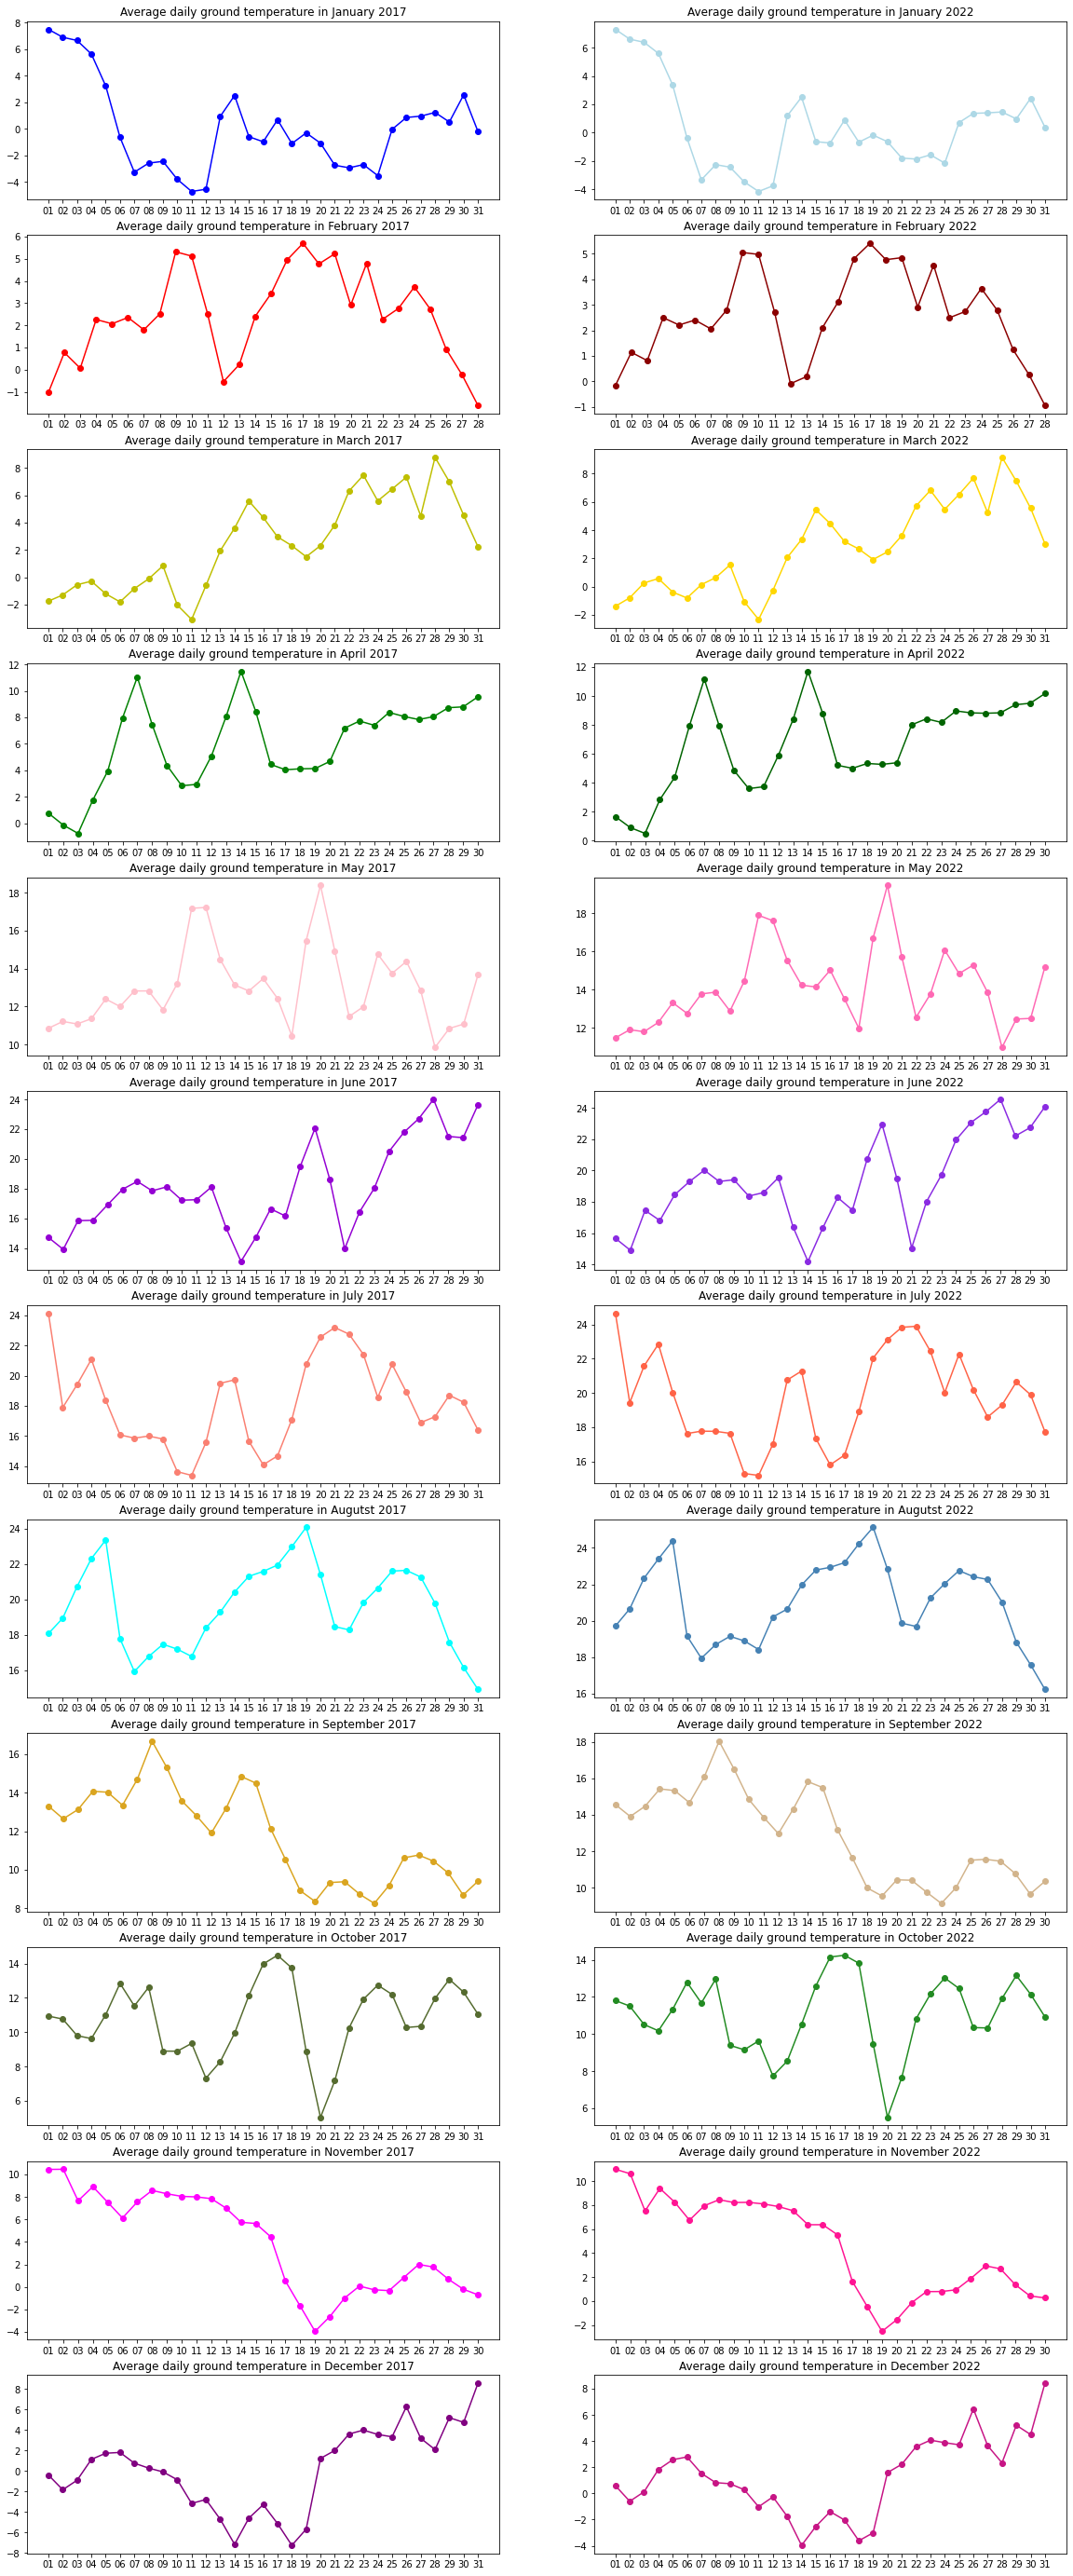

In [24]:
fig, axs = plt.subplots(12,2, figsize=(20, 50))

axs[0,0].plot(B_daily_mean_2017jan, marker='o', linestyle='-', color='b')
axs[0,0].set_xticks(B_daily_mean_2017jan.index, [date.strftime('%d') for date in B_daily_mean_2017jan.index])
axs[0,0].set_title('Average daily ground temperature in January 2017')

axs[1,0].plot(B_daily_mean_2017feb, marker='o', linestyle='-', color='r')
axs[1,0].set_xticks(B_daily_mean_2017feb.index, [date.strftime('%d') for date in B_daily_mean_2017feb.index])
axs[1,0].set_title('Average daily ground temperature in February 2017')

axs[2,0].plot(B_daily_mean_2017mar, marker='o', linestyle='-', color='y')
axs[2,0].set_xticks(B_daily_mean_2017mar.index, [date.strftime('%d') for date in B_daily_mean_2017mar.index])
axs[2,0].set_title('Average daily ground temperature in March 2017')

axs[3,0].plot(B_daily_mean_2017apr, marker='o', linestyle='-', color='g')
axs[3,0].set_xticks(B_daily_mean_2017apr.index, [date.strftime('%d') for date in B_daily_mean_2017apr.index])
axs[3,0].set_title('Average daily ground temperature in April 2017')

axs[4,0].plot(B_daily_mean_2017may, marker='o', linestyle='-', color='pink')
axs[4,0].set_xticks(B_daily_mean_2017may.index, [date.strftime('%d') for date in B_daily_mean_2017may.index])
axs[4,0].set_title('Average daily ground temperature in May 2017')

axs[5,0].plot(B_daily_mean_2017jun, marker='o', linestyle='-', color='darkviolet')
axs[5,0].set_xticks(B_daily_mean_2017jun.index, [date.strftime('%d') for date in B_daily_mean_2017jun.index])
axs[5,0].set_title('Average daily ground temperature in June 2017')

axs[6,0].plot(B_daily_mean_2017jul, marker='o', linestyle='-', color='salmon')
axs[6,0].set_xticks(B_daily_mean_2017jul.index, [date.strftime('%d') for date in B_daily_mean_2017jul.index])
axs[6,0].set_title('Average daily ground temperature in July 2017')

axs[7,0].plot(B_daily_mean_2017aug, marker='o', linestyle='-', color='aqua')
axs[7,0].set_xticks(B_daily_mean_2017aug.index, [date.strftime('%d') for date in B_daily_mean_2017aug.index])
axs[7,0].set_title('Average daily ground temperature in Augutst 2017')

axs[8,0].plot(B_daily_mean_2017sep, marker='o', linestyle='-', color='goldenrod')
axs[8,0].set_xticks(B_daily_mean_2017sep.index, [date.strftime('%d') for date in B_daily_mean_2017sep.index])
axs[8,0].set_title('Average daily ground temperature in September 2017')

axs[9,0].plot(B_daily_mean_2017oct, marker='o', linestyle='-', color='darkolivegreen')
axs[9,0].set_xticks(B_daily_mean_2017oct.index, [date.strftime('%d') for date in B_daily_mean_2017oct.index])
axs[9,0].set_title('Average daily ground temperature in October 2017')

axs[10,0].plot(B_daily_mean_2017nov, marker='o', linestyle='-', color='fuchsia')
axs[10,0].set_xticks(B_daily_mean_2017nov.index, [date.strftime('%d') for date in B_daily_mean_2017nov.index])
axs[10,0].set_title('Average daily ground temperature in November 2017')

axs[11,0].plot(B_daily_mean_2017dec, marker='o', linestyle='-', color='purple')
axs[11,0].set_xticks(B_daily_mean_2017dec.index, [date.strftime('%d') for date in B_daily_mean_2017dec.index])
axs[11,0].set_title('Average daily ground temperature in December 2017')


axs[0,1].plot(B_daily_mean_2022jan, marker='o', linestyle='-', color='lightblue')
axs[0,1].set_xticks(B_daily_mean_2022jan.index, [date.strftime('%d') for date in B_daily_mean_2022jan.index])
axs[0,1].set_title('Average daily ground temperature in January 2022')

axs[1,1].plot(B_daily_mean_2022feb, marker='o', linestyle='-', color='darkred')
axs[1,1].set_xticks(B_daily_mean_2022feb.index, [date.strftime('%d') for date in B_daily_mean_2022feb.index])
axs[1,1].set_title('Average daily ground temperature in February 2022')

axs[2,1].plot(B_daily_mean_2022mar, marker='o', linestyle='-', color='gold')
axs[2,1].set_xticks(B_daily_mean_2022mar.index, [date.strftime('%d') for date in B_daily_mean_2022mar.index])
axs[2,1].set_title('Average daily ground temperature in March 2022')

axs[3,1].plot(B_daily_mean_2022apr, marker='o', linestyle='-', color='darkgreen')
axs[3,1].set_xticks(B_daily_mean_2022apr.index, [date.strftime('%d') for date in B_daily_mean_2022apr.index])
axs[3,1].set_title('Average daily ground temperature in April 2022')

axs[4,1].plot(B_daily_mean_2022may, marker='o', linestyle='-', color='hotpink')
axs[4,1].set_xticks(B_daily_mean_2022may.index, [date.strftime('%d') for date in B_daily_mean_2022may.index])
axs[4,1].set_title('Average daily ground temperature in May 2022')

axs[5,1].plot(B_daily_mean_2022jun, marker='o', linestyle='-', color='blueviolet')
axs[5,1].set_xticks(B_daily_mean_2022jun.index, [date.strftime('%d') for date in B_daily_mean_2022jun.index])
axs[5,1].set_title('Average daily ground temperature in June 2022')

axs[6,1].plot(B_daily_mean_2022jul, marker='o', linestyle='-', color='tomato')
axs[6,1].set_xticks(B_daily_mean_2022jul.index, [date.strftime('%d') for date in B_daily_mean_2022jul.index])
axs[6,1].set_title('Average daily ground temperature in July 2022')

axs[7,1].plot(B_daily_mean_2022aug, marker='o', linestyle='-', color='steelblue')
axs[7,1].set_xticks(B_daily_mean_2022aug.index, [date.strftime('%d') for date in B_daily_mean_2022aug.index])
axs[7,1].set_title('Average daily ground temperature in Augutst 2022')

axs[8,1].plot(B_daily_mean_2022sep, marker='o', linestyle='-', color='tan')
axs[8,1].set_xticks(B_daily_mean_2022sep.index, [date.strftime('%d') for date in B_daily_mean_2022sep.index])
axs[8,1].set_title('Average daily ground temperature in September 2022')

axs[9,1].plot(B_daily_mean_2022oct, marker='o', linestyle='-', color='forestgreen')
axs[9,1].set_xticks(B_daily_mean_2022oct.index, [date.strftime('%d') for date in B_daily_mean_2022oct.index])
axs[9,1].set_title('Average daily ground temperature in October 2022')

axs[10,1].plot(B_daily_mean_2022nov, marker='o', linestyle='-', color='deeppink')
axs[10,1].set_xticks(B_daily_mean_2022nov.index, [date.strftime('%d') for date in B_daily_mean_2022nov.index])
axs[10,1].set_title('Average daily ground temperature in November 2022')

axs[11,1].plot(B_daily_mean_2022dec, marker='o', linestyle='-', color='mediumvioletred')
axs[11,1].set_xticks(B_daily_mean_2022dec.index, [date.strftime('%d') for date in B_daily_mean_2022dec.index])
axs[11,1].set_title('Average daily ground temperature in December 2022')

In [25]:
C_without_outliers_2017= C_without_outliers[C_without_outliers['Data_godzina'].dt.year == 2017] 
C_without_outliers_2017jan = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 1]
C_without_outliers_2017feb = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 2]
C_without_outliers_2017mar = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 3]
C_without_outliers_2017apr = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 4]
C_without_outliers_2017may = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 5]
C_without_outliers_2017jun = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 6]
C_without_outliers_2017jul = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 7]
C_without_outliers_2017aug = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 8]
C_without_outliers_2017sep = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 9]
C_without_outliers_2017oct = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 10]
C_without_outliers_2017nov = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 11]
C_without_outliers_2017dec = C_without_outliers_2017[C_without_outliers_2017['Data_godzina'].dt.month == 12]

C_without_outliers_2022= C_without_outliers[C_without_outliers['Data_godzina'].dt.year == 2022] 
C_without_outliers_2022jan = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 1]
C_without_outliers_2022feb = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 2]
C_without_outliers_2022mar = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 3]
C_without_outliers_2022apr = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 4]
C_without_outliers_2022may = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 5]
C_without_outliers_2022jun = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 6]
C_without_outliers_2022jul = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 7]
C_without_outliers_2022aug = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 8]
C_without_outliers_2022sep = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 9]
C_without_outliers_2022oct = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 10]
C_without_outliers_2022nov = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 11]
C_without_outliers_2022dec = C_without_outliers_2022[C_without_outliers_2022['Data_godzina'].dt.month == 12]

C_daily_groups_2017jan = C_without_outliers_2017jan.groupby(C_without_outliers_2017jan['Data_godzina'].dt.date)
C_daily_mean_2017jan = daily_groups_2017jan['Wartość'].mean()
C_daily_groups_2017feb = C_without_outliers_2017feb.groupby(C_without_outliers_2017feb['Data_godzina'].dt.date)
C_daily_mean_2017feb = daily_groups_2017feb['Wartość'].mean()
C_daily_groups_2017mar = C_without_outliers_2017mar.groupby(C_without_outliers_2017mar['Data_godzina'].dt.date)
C_daily_mean_2017mar = daily_groups_2017mar['Wartość'].mean()
C_daily_groups_2017apr = C_without_outliers_2017apr.groupby(C_without_outliers_2017apr['Data_godzina'].dt.date)
C_daily_mean_2017apr = daily_groups_2017apr['Wartość'].mean()
C_daily_groups_2017may = C_without_outliers_2017may.groupby(C_without_outliers_2017may['Data_godzina'].dt.date)
C_daily_mean_2017may = daily_groups_2017may['Wartość'].mean()
C_daily_groups_2017jun = C_without_outliers_2017jun.groupby(C_without_outliers_2017jun['Data_godzina'].dt.date)
C_daily_mean_2017jun = daily_groups_2017jun['Wartość'].mean()
C_daily_groups_2017jul = C_without_outliers_2017jul.groupby(C_without_outliers_2017jul['Data_godzina'].dt.date)
C_daily_mean_2017jul = daily_groups_2017jul['Wartość'].mean()
C_daily_groups_2017aug = C_without_outliers_2017aug.groupby(C_without_outliers_2017aug['Data_godzina'].dt.date)
C_daily_mean_2017aug = daily_groups_2017aug['Wartość'].mean()
C_daily_groups_2017sep = C_without_outliers_2017sep.groupby(C_without_outliers_2017sep['Data_godzina'].dt.date)
C_daily_mean_2017sep = daily_groups_2017sep['Wartość'].mean()
C_daily_groups_2017oct = C_without_outliers_2017oct.groupby(C_without_outliers_2017oct['Data_godzina'].dt.date)
C_daily_mean_2017oct = daily_groups_2017oct['Wartość'].mean()
C_daily_groups_2017nov = C_without_outliers_2017nov.groupby(C_without_outliers_2017nov['Data_godzina'].dt.date)
C_daily_mean_2017nov = daily_groups_2017nov['Wartość'].mean()
C_daily_groups_2017dec = C_without_outliers_2017dec.groupby(C_without_outliers_2017dec['Data_godzina'].dt.date)
C_daily_mean_2017dec = daily_groups_2017dec['Wartość'].mean()


C_daily_groups_2022jan = C_without_outliers_2022jan.groupby(C_without_outliers_2022jan['Data_godzina'].dt.date)
C_daily_mean_2022jan = C_daily_groups_2022jan['Wartość'].mean()
C_daily_groups_2022feb = C_without_outliers_2022feb.groupby(C_without_outliers_2022feb['Data_godzina'].dt.date)
C_daily_mean_2022feb = C_daily_groups_2022feb['Wartość'].mean()
C_daily_groups_2022mar = C_without_outliers_2022mar.groupby(C_without_outliers_2022mar['Data_godzina'].dt.date)
C_daily_mean_2022mar = C_daily_groups_2022mar['Wartość'].mean()
C_daily_groups_2022apr = C_without_outliers_2022apr.groupby(C_without_outliers_2022apr['Data_godzina'].dt.date)
C_daily_mean_2022apr = C_daily_groups_2022apr['Wartość'].mean()
C_daily_groups_2022may = C_without_outliers_2022may.groupby(C_without_outliers_2022may['Data_godzina'].dt.date)
C_daily_mean_2022may = C_daily_groups_2022may['Wartość'].mean()
C_daily_groups_2022jun = C_without_outliers_2022jun.groupby(C_without_outliers_2022jun['Data_godzina'].dt.date)
C_daily_mean_2022jun = C_daily_groups_2022jun['Wartość'].mean()
C_daily_groups_2022jul = C_without_outliers_2022jul.groupby(C_without_outliers_2022jul['Data_godzina'].dt.date)
C_daily_mean_2022jul = C_daily_groups_2022jul['Wartość'].mean()
C_daily_groups_2022aug = C_without_outliers_2022aug.groupby(C_without_outliers_2022aug['Data_godzina'].dt.date)
C_daily_mean_2022aug = C_daily_groups_2022aug['Wartość'].mean()
C_daily_groups_2022sep = C_without_outliers_2022sep.groupby(C_without_outliers_2022sep['Data_godzina'].dt.date)
C_daily_mean_2022sep = C_daily_groups_2022sep['Wartość'].mean()
C_daily_groups_2022oct = C_without_outliers_2022oct.groupby(C_without_outliers_2022oct['Data_godzina'].dt.date)
C_daily_mean_2022oct = C_daily_groups_2022oct['Wartość'].mean()
C_daily_groups_2022nov = C_without_outliers_2022nov.groupby(C_without_outliers_2022nov['Data_godzina'].dt.date)
C_daily_mean_2022nov = C_daily_groups_2022nov['Wartość'].mean()
C_daily_groups_2022dec = C_without_outliers_2022dec.groupby(C_without_outliers_2022dec['Data_godzina'].dt.date)
C_daily_mean_2022dec = C_daily_groups_2022dec['Wartość'].mean()

Text(0.5, 1.0, 'Average daily wind speed in December 2022')

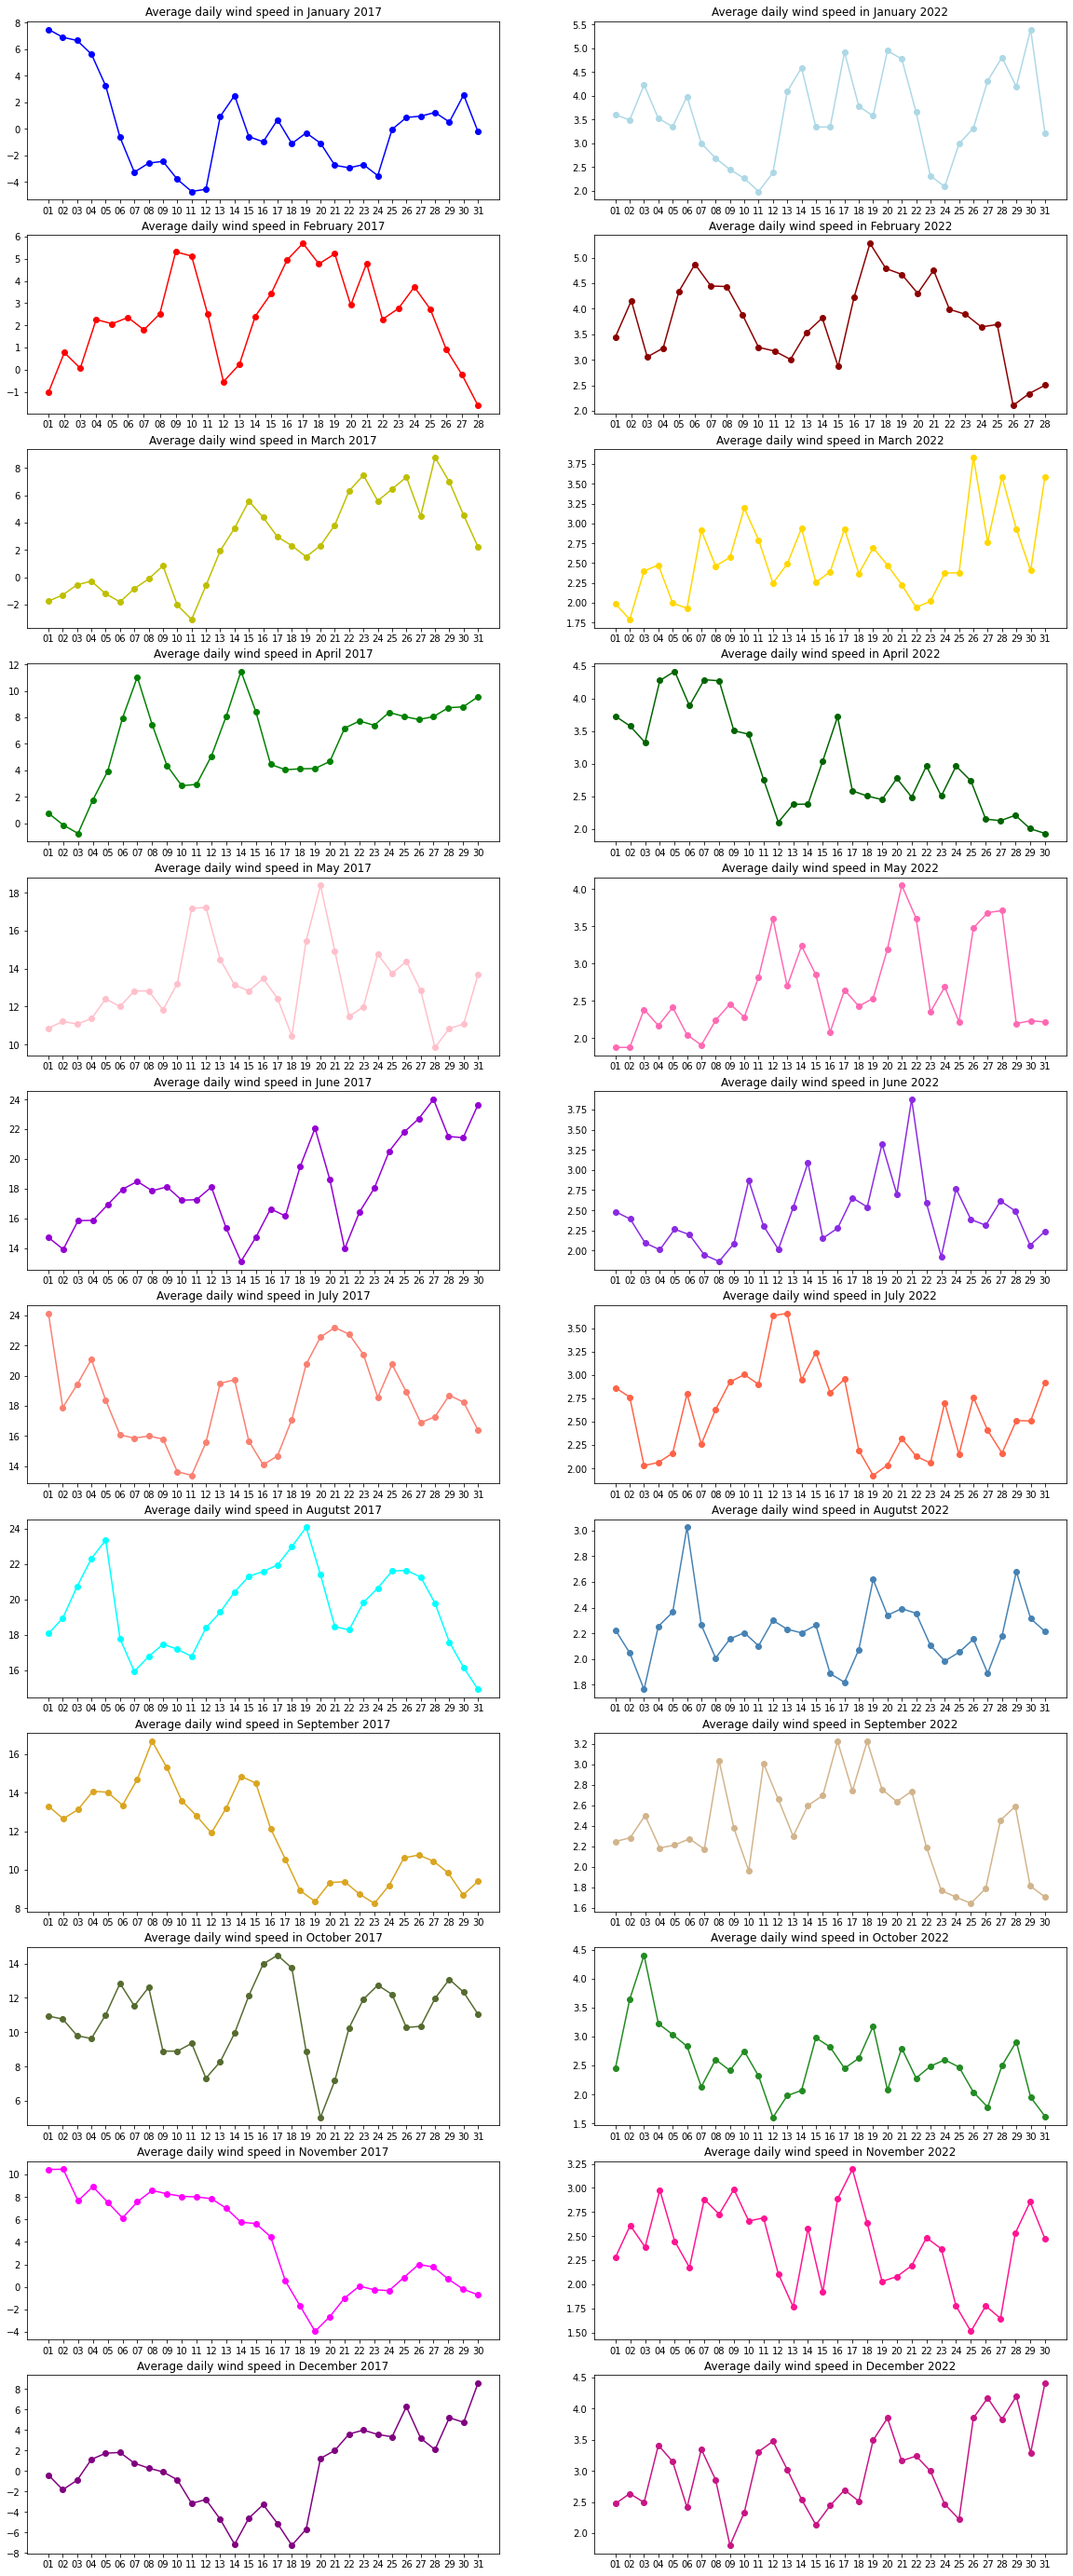

In [26]:
fig, axs = plt.subplots(12,2, figsize=(20, 50))

axs[0,0].plot(C_daily_mean_2017jan, marker='o', linestyle='-', color='b')
axs[0,0].set_xticks(C_daily_mean_2017jan.index, [date.strftime('%d') for date in C_daily_mean_2017jan.index])
axs[0,0].set_title('Average daily wind speed in January 2017')

axs[1,0].plot(C_daily_mean_2017feb, marker='o', linestyle='-', color='r')
axs[1,0].set_xticks(C_daily_mean_2017feb.index, [date.strftime('%d') for date in C_daily_mean_2017feb.index])
axs[1,0].set_title('Average daily wind speed in February 2017')

axs[2,0].plot(C_daily_mean_2017mar, marker='o', linestyle='-', color='y')
axs[2,0].set_xticks(C_daily_mean_2017mar.index, [date.strftime('%d') for date in C_daily_mean_2017mar.index])
axs[2,0].set_title('Average daily wind speed in March 2017')

axs[3,0].plot(C_daily_mean_2017apr, marker='o', linestyle='-', color='g')
axs[3,0].set_xticks(C_daily_mean_2017apr.index, [date.strftime('%d') for date in C_daily_mean_2017apr.index])
axs[3,0].set_title('Average daily wind speed in April 2017')

axs[4,0].plot(C_daily_mean_2017may, marker='o', linestyle='-', color='pink')
axs[4,0].set_xticks(C_daily_mean_2017may.index, [date.strftime('%d') for date in C_daily_mean_2017may.index])
axs[4,0].set_title('Average daily wind speed in May 2017')

axs[5,0].plot(C_daily_mean_2017jun, marker='o', linestyle='-', color='darkviolet')
axs[5,0].set_xticks(C_daily_mean_2017jun.index, [date.strftime('%d') for date in C_daily_mean_2017jun.index])
axs[5,0].set_title('Average daily wind speed in June 2017')

axs[6,0].plot(C_daily_mean_2017jul, marker='o', linestyle='-', color='salmon')
axs[6,0].set_xticks(C_daily_mean_2017jul.index, [date.strftime('%d') for date in C_daily_mean_2017jul.index])
axs[6,0].set_title('Average daily wind speed in July 2017')

axs[7,0].plot(C_daily_mean_2017aug, marker='o', linestyle='-', color='aqua')
axs[7,0].set_xticks(C_daily_mean_2017aug.index, [date.strftime('%d') for date in C_daily_mean_2017aug.index])
axs[7,0].set_title('Average daily wind speed in Augutst 2017')

axs[8,0].plot(C_daily_mean_2017sep, marker='o', linestyle='-', color='goldenrod')
axs[8,0].set_xticks(C_daily_mean_2017sep.index, [date.strftime('%d') for date in C_daily_mean_2017sep.index])
axs[8,0].set_title('Average daily wind speed in September 2017')

axs[9,0].plot(C_daily_mean_2017oct, marker='o', linestyle='-', color='darkolivegreen')
axs[9,0].set_xticks(C_daily_mean_2017oct.index, [date.strftime('%d') for date in C_daily_mean_2017oct.index])
axs[9,0].set_title('Average daily wind speed in October 2017')

axs[10,0].plot(C_daily_mean_2017nov, marker='o', linestyle='-', color='fuchsia')
axs[10,0].set_xticks(C_daily_mean_2017nov.index, [date.strftime('%d') for date in C_daily_mean_2017nov.index])
axs[10,0].set_title('Average daily wind speed in November 2017')

axs[11,0].plot(C_daily_mean_2017dec, marker='o', linestyle='-', color='purple')
axs[11,0].set_xticks(C_daily_mean_2017dec.index, [date.strftime('%d') for date in C_daily_mean_2017dec.index])
axs[11,0].set_title('Average daily wind speed in December 2017')


axs[0,1].plot(C_daily_mean_2022jan, marker='o', linestyle='-', color='lightblue')
axs[0,1].set_xticks(C_daily_mean_2022jan.index, [date.strftime('%d') for date in C_daily_mean_2022jan.index])
axs[0,1].set_title('Average daily wind speed in January 2022')

axs[1,1].plot(C_daily_mean_2022feb, marker='o', linestyle='-', color='darkred')
axs[1,1].set_xticks(C_daily_mean_2022feb.index, [date.strftime('%d') for date in C_daily_mean_2022feb.index])
axs[1,1].set_title('Average daily wind speed in February 2022')

axs[2,1].plot(C_daily_mean_2022mar, marker='o', linestyle='-', color='gold')
axs[2,1].set_xticks(C_daily_mean_2022mar.index, [date.strftime('%d') for date in C_daily_mean_2022mar.index])
axs[2,1].set_title('Average daily wind speed in March 2022')

axs[3,1].plot(C_daily_mean_2022apr, marker='o', linestyle='-', color='darkgreen')
axs[3,1].set_xticks(C_daily_mean_2022apr.index, [date.strftime('%d') for date in C_daily_mean_2022apr.index])
axs[3,1].set_title('Average daily wind speed in April 2022')

axs[4,1].plot(C_daily_mean_2022may, marker='o', linestyle='-', color='hotpink')
axs[4,1].set_xticks(C_daily_mean_2022may.index, [date.strftime('%d') for date in C_daily_mean_2022may.index])
axs[4,1].set_title('Average daily wind speed in May 2022')

axs[5,1].plot(C_daily_mean_2022jun, marker='o', linestyle='-', color='blueviolet')
axs[5,1].set_xticks(C_daily_mean_2022jun.index, [date.strftime('%d') for date in C_daily_mean_2022jun.index])
axs[5,1].set_title('Average daily wind speed in June 2022')

axs[6,1].plot(C_daily_mean_2022jul, marker='o', linestyle='-', color='tomato')
axs[6,1].set_xticks(C_daily_mean_2022jul.index, [date.strftime('%d') for date in C_daily_mean_2022jul.index])
axs[6,1].set_title('Average daily wind speed in July 2022')

axs[7,1].plot(C_daily_mean_2022aug, marker='o', linestyle='-', color='steelblue')
axs[7,1].set_xticks(C_daily_mean_2022aug.index, [date.strftime('%d') for date in C_daily_mean_2022aug.index])
axs[7,1].set_title('Average daily wind speed in Augutst 2022')

axs[8,1].plot(C_daily_mean_2022sep, marker='o', linestyle='-', color='tan')
axs[8,1].set_xticks(C_daily_mean_2022sep.index, [date.strftime('%d') for date in C_daily_mean_2022sep.index])
axs[8,1].set_title('Average daily wind speed in September 2022')

axs[9,1].plot(C_daily_mean_2022oct, marker='o', linestyle='-', color='forestgreen')
axs[9,1].set_xticks(C_daily_mean_2022oct.index, [date.strftime('%d') for date in C_daily_mean_2022oct.index])
axs[9,1].set_title('Average daily wind speed in October 2022')

axs[10,1].plot(C_daily_mean_2022nov, marker='o', linestyle='-', color='deeppink')
axs[10,1].set_xticks(C_daily_mean_2022nov.index, [date.strftime('%d') for date in C_daily_mean_2022nov.index])
axs[10,1].set_title('Average daily wind speed in November 2022')

axs[11,1].plot(C_daily_mean_2022dec, marker='o', linestyle='-', color='mediumvioletred')
axs[11,1].set_xticks(C_daily_mean_2022dec.index, [date.strftime('%d') for date in C_daily_mean_2022dec.index])
axs[11,1].set_title('Average daily wind speed in December 2022')

In [27]:
D_without_outliers_2017= D_without_outliers[D_without_outliers['Data_godzina'].dt.year == 2017] 
D_without_outliers_2017jan = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 1]
D_without_outliers_2017feb = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 2]
D_without_outliers_2017mar = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 3]
D_without_outliers_2017apr = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 4]
D_without_outliers_2017may = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 5]
D_without_outliers_2017jun = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 6]
D_without_outliers_2017jul = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 7]
D_without_outliers_2017aug = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 8]
D_without_outliers_2017sep = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 9]
D_without_outliers_2017oct = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 10]
D_without_outliers_2017nov = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 11]
D_without_outliers_2017dec = D_without_outliers_2017[D_without_outliers_2017['Data_godzina'].dt.month == 12]

D_without_outliers_2022= D_without_outliers[D_without_outliers['Data_godzina'].dt.year == 2022] 
D_without_outliers_2022jan = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 1]
D_without_outliers_2022feb = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 2]
D_without_outliers_2022mar = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 3]
D_without_outliers_2022apr = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 4]
D_without_outliers_2022may = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 5]
D_without_outliers_2022jun = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 6]
D_without_outliers_2022jul = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 7]
D_without_outliers_2022aug = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 8]
D_without_outliers_2022sep = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 9]
D_without_outliers_2022oct = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 10]
D_without_outliers_2022nov = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 11]
D_without_outliers_2022dec = D_without_outliers_2022[D_without_outliers_2022['Data_godzina'].dt.month == 12]

D_daily_groups_2017jan = D_without_outliers_2017jan.groupby(D_without_outliers_2017jan['Data_godzina'].dt.date)
D_daily_mean_2017jan = daily_groups_2017jan['Wartość'].mean()
D_daily_groups_2017feb = D_without_outliers_2017feb.groupby(D_without_outliers_2017feb['Data_godzina'].dt.date)
D_daily_mean_2017feb = daily_groups_2017feb['Wartość'].mean()
D_daily_groups_2017mar = D_without_outliers_2017mar.groupby(D_without_outliers_2017mar['Data_godzina'].dt.date)
D_daily_mean_2017mar = daily_groups_2017mar['Wartość'].mean()
D_daily_groups_2017apr = D_without_outliers_2017apr.groupby(D_without_outliers_2017apr['Data_godzina'].dt.date)
D_daily_mean_2017apr = daily_groups_2017apr['Wartość'].mean()
D_daily_groups_2017may = D_without_outliers_2017may.groupby(D_without_outliers_2017may['Data_godzina'].dt.date)
D_daily_mean_2017may = daily_groups_2017may['Wartość'].mean()
D_daily_groups_2017jun = D_without_outliers_2017jun.groupby(D_without_outliers_2017jun['Data_godzina'].dt.date)
D_daily_mean_2017jun = daily_groups_2017jun['Wartość'].mean()
D_daily_groups_2017jul = D_without_outliers_2017jul.groupby(D_without_outliers_2017jul['Data_godzina'].dt.date)
D_daily_mean_2017jul = daily_groups_2017jul['Wartość'].mean()
D_daily_groups_2017aug = D_without_outliers_2017aug.groupby(D_without_outliers_2017aug['Data_godzina'].dt.date)
D_daily_mean_2017aug = daily_groups_2017aug['Wartość'].mean()
D_daily_groups_2017sep = D_without_outliers_2017sep.groupby(D_without_outliers_2017sep['Data_godzina'].dt.date)
D_daily_mean_2017sep = daily_groups_2017sep['Wartość'].mean()
D_daily_groups_2017oct = D_without_outliers_2017oct.groupby(D_without_outliers_2017oct['Data_godzina'].dt.date)
D_daily_mean_2017oct = daily_groups_2017oct['Wartość'].mean()
D_daily_groups_2017nov = D_without_outliers_2017nov.groupby(D_without_outliers_2017nov['Data_godzina'].dt.date)
D_daily_mean_2017nov = daily_groups_2017nov['Wartość'].mean()
D_daily_groups_2017dec = D_without_outliers_2017dec.groupby(D_without_outliers_2017dec['Data_godzina'].dt.date)
D_daily_mean_2017dec = daily_groups_2017dec['Wartość'].mean()


D_daily_groups_2022jan = D_without_outliers_2022jan.groupby(D_without_outliers_2022jan['Data_godzina'].dt.date)
D_daily_mean_2022jan = D_daily_groups_2022jan['Wartość'].mean()
D_daily_groups_2022feb = D_without_outliers_2022feb.groupby(D_without_outliers_2022feb['Data_godzina'].dt.date)
D_daily_mean_2022feb = D_daily_groups_2022feb['Wartość'].mean()
D_daily_groups_2022mar = D_without_outliers_2022mar.groupby(D_without_outliers_2022mar['Data_godzina'].dt.date)
D_daily_mean_2022mar = D_daily_groups_2022mar['Wartość'].mean()
D_daily_groups_2022apr = D_without_outliers_2022apr.groupby(D_without_outliers_2022apr['Data_godzina'].dt.date)
D_daily_mean_2022apr = D_daily_groups_2022apr['Wartość'].mean()
D_daily_groups_2022may = D_without_outliers_2022may.groupby(D_without_outliers_2022may['Data_godzina'].dt.date)
D_daily_mean_2022may = D_daily_groups_2022may['Wartość'].mean()
D_daily_groups_2022jun = D_without_outliers_2022jun.groupby(D_without_outliers_2022jun['Data_godzina'].dt.date)
D_daily_mean_2022jun = D_daily_groups_2022jun['Wartość'].mean()
D_daily_groups_2022jul = D_without_outliers_2022jul.groupby(D_without_outliers_2022jul['Data_godzina'].dt.date)
D_daily_mean_2022jul = D_daily_groups_2022jul['Wartość'].mean()
D_daily_groups_2022aug = D_without_outliers_2022aug.groupby(D_without_outliers_2022aug['Data_godzina'].dt.date)
D_daily_mean_2022aug = D_daily_groups_2022aug['Wartość'].mean()
D_daily_groups_2022sep = D_without_outliers_2022sep.groupby(D_without_outliers_2022sep['Data_godzina'].dt.date)
D_daily_mean_2022sep = D_daily_groups_2022sep['Wartość'].mean()
D_daily_groups_2022oct = D_without_outliers_2022oct.groupby(D_without_outliers_2022oct['Data_godzina'].dt.date)
D_daily_mean_2022oct = D_daily_groups_2022oct['Wartość'].mean()
D_daily_groups_2022nov = D_without_outliers_2022nov.groupby(D_without_outliers_2022nov['Data_godzina'].dt.date)
D_daily_mean_2022nov = D_daily_groups_2022nov['Wartość'].mean()
D_daily_groups_2022dec = D_without_outliers_2022dec.groupby(D_without_outliers_2022dec['Data_godzina'].dt.date)
D_daily_mean_2022dec = D_daily_groups_2022dec['Wartość'].mean()

Text(0.5, 1.0, 'Sum of daily precipitation in December 2022')

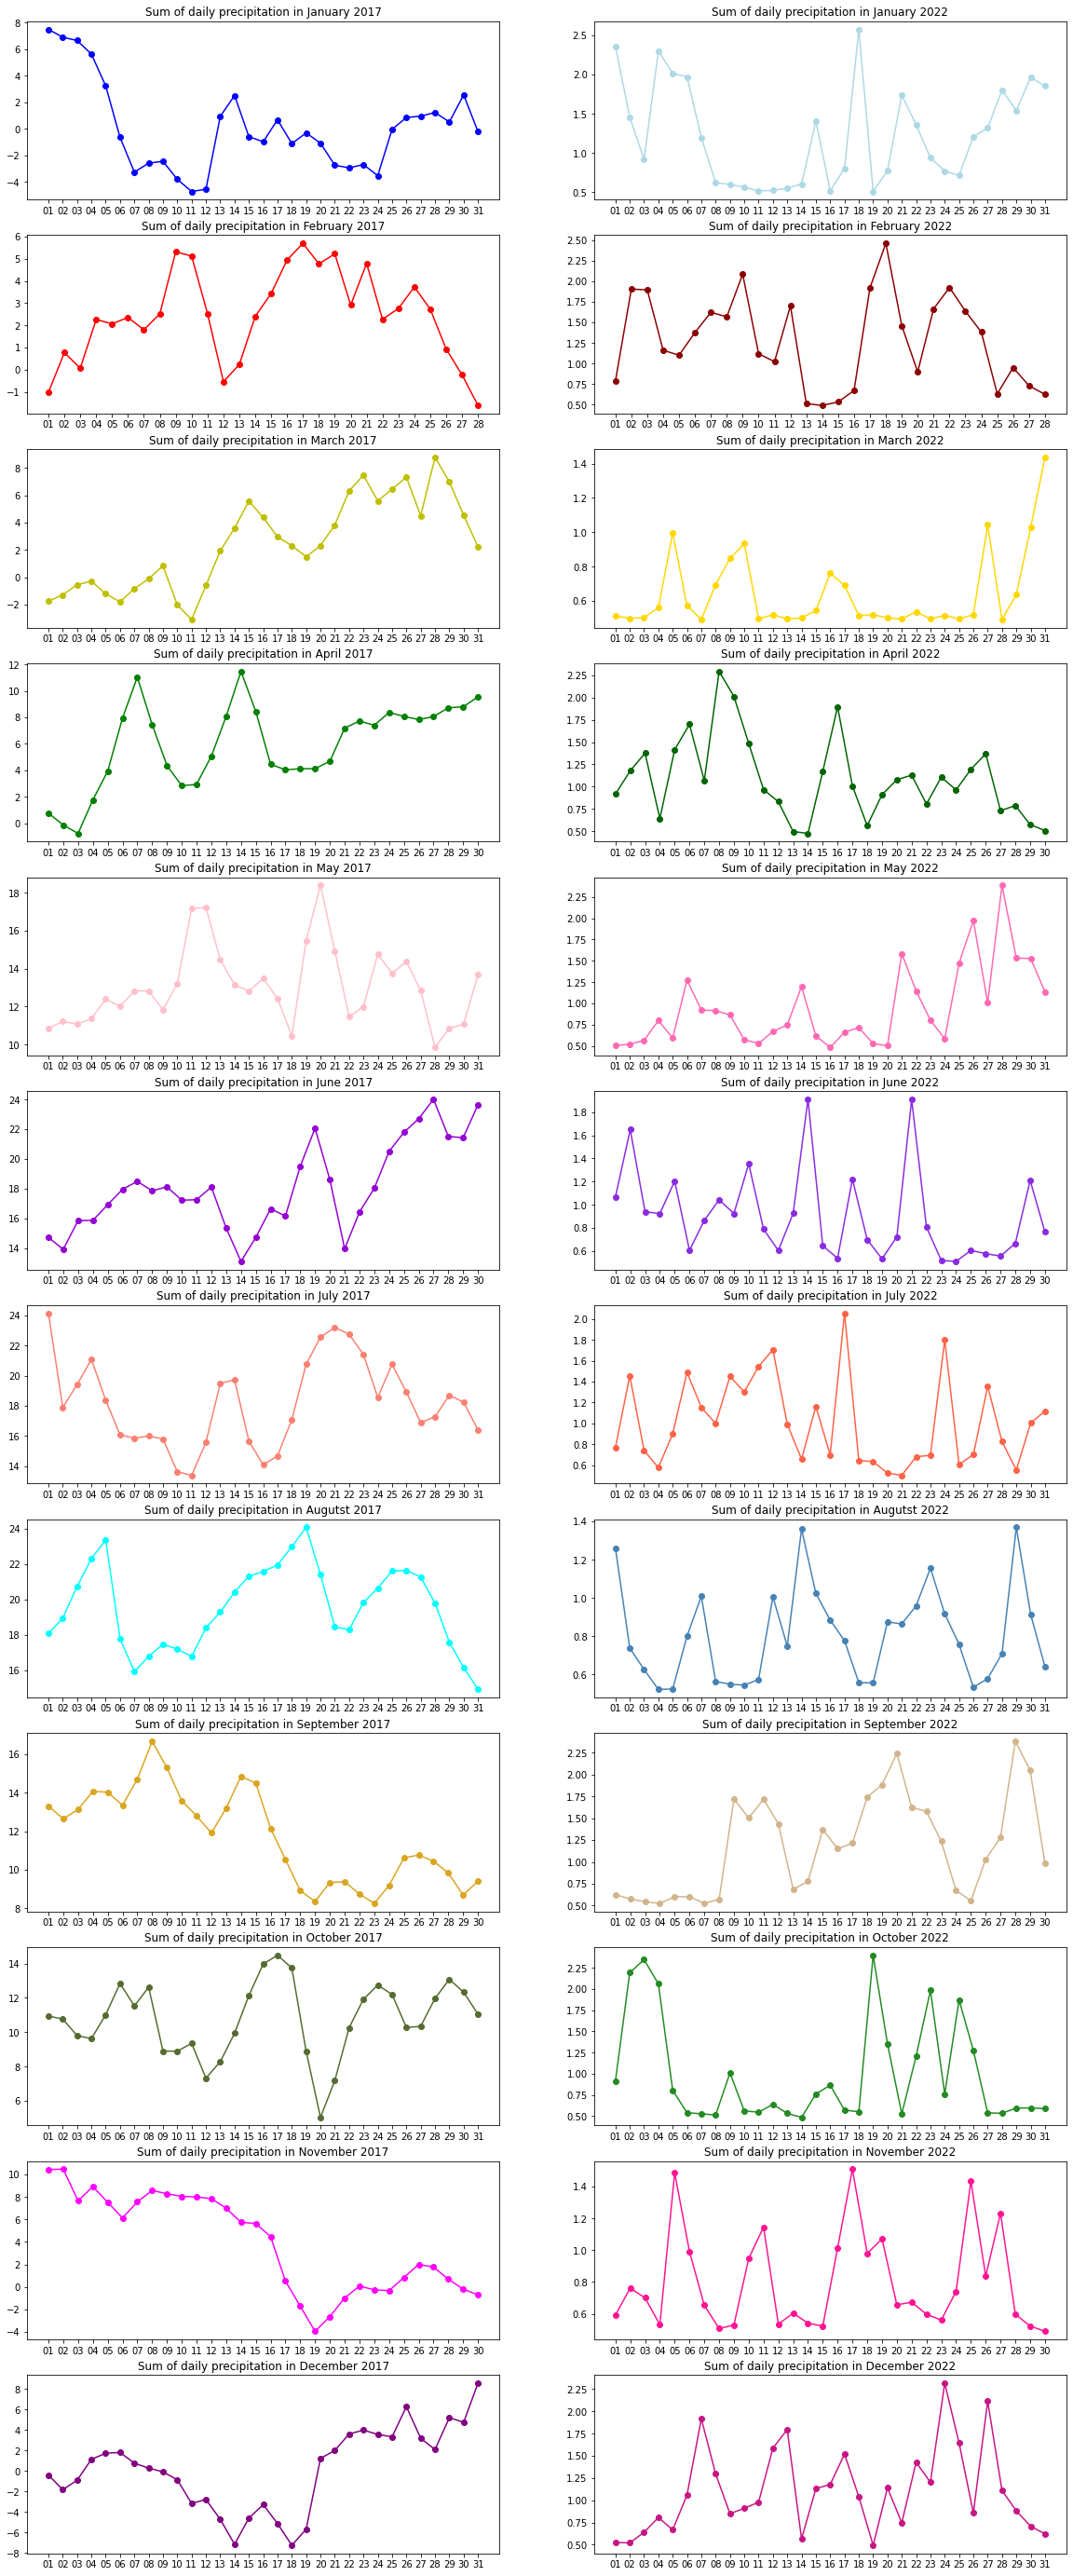

In [28]:
fig, axs = plt.subplots(12,2, figsize=(20, 50))

axs[0,0].plot(D_daily_mean_2017jan, marker='o', linestyle='-', color='b')
axs[0,0].set_xticks(D_daily_mean_2017jan.index, [date.strftime('%d') for date in D_daily_mean_2017jan.index])
axs[0,0].set_title('Sum of daily precipitation in January 2017')

axs[1,0].plot(D_daily_mean_2017feb, marker='o', linestyle='-', color='r')
axs[1,0].set_xticks(D_daily_mean_2017feb.index, [date.strftime('%d') for date in D_daily_mean_2017feb.index])
axs[1,0].set_title('Sum of daily precipitation in February 2017')

axs[2,0].plot(D_daily_mean_2017mar, marker='o', linestyle='-', color='y')
axs[2,0].set_xticks(D_daily_mean_2017mar.index, [date.strftime('%d') for date in D_daily_mean_2017mar.index])
axs[2,0].set_title('Sum of daily precipitation in March 2017')

axs[3,0].plot(D_daily_mean_2017apr, marker='o', linestyle='-', color='g')
axs[3,0].set_xticks(D_daily_mean_2017apr.index, [date.strftime('%d') for date in D_daily_mean_2017apr.index])
axs[3,0].set_title('Sum of daily precipitation in April 2017')

axs[4,0].plot(D_daily_mean_2017may, marker='o', linestyle='-', color='pink')
axs[4,0].set_xticks(D_daily_mean_2017may.index, [date.strftime('%d') for date in D_daily_mean_2017may.index])
axs[4,0].set_title('Sum of daily precipitation in May 2017')

axs[5,0].plot(D_daily_mean_2017jun, marker='o', linestyle='-', color='darkviolet')
axs[5,0].set_xticks(D_daily_mean_2017jun.index, [date.strftime('%d') for date in D_daily_mean_2017jun.index])
axs[5,0].set_title('Sum of daily precipitation in June 2017')

axs[6,0].plot(D_daily_mean_2017jul, marker='o', linestyle='-', color='salmon')
axs[6,0].set_xticks(D_daily_mean_2017jul.index, [date.strftime('%d') for date in D_daily_mean_2017jul.index])
axs[6,0].set_title('Sum of daily precipitation in July 2017')

axs[7,0].plot(D_daily_mean_2017aug, marker='o', linestyle='-', color='aqua')
axs[7,0].set_xticks(D_daily_mean_2017aug.index, [date.strftime('%d') for date in D_daily_mean_2017aug.index])
axs[7,0].set_title('Sum of daily precipitation in Augutst 2017')

axs[8,0].plot(D_daily_mean_2017sep, marker='o', linestyle='-', color='goldenrod')
axs[8,0].set_xticks(D_daily_mean_2017sep.index, [date.strftime('%d') for date in D_daily_mean_2017sep.index])
axs[8,0].set_title('Sum of daily precipitation in September 2017')

axs[9,0].plot(D_daily_mean_2017oct, marker='o', linestyle='-', color='darkolivegreen')
axs[9,0].set_xticks(D_daily_mean_2017oct.index, [date.strftime('%d') for date in D_daily_mean_2017oct.index])
axs[9,0].set_title('Sum of daily precipitation in October 2017')

axs[10,0].plot(D_daily_mean_2017nov, marker='o', linestyle='-', color='fuchsia')
axs[10,0].set_xticks(D_daily_mean_2017nov.index, [date.strftime('%d') for date in D_daily_mean_2017nov.index])
axs[10,0].set_title('Sum of daily precipitation in November 2017')

axs[11,0].plot(D_daily_mean_2017dec, marker='o', linestyle='-', color='purple')
axs[11,0].set_xticks(D_daily_mean_2017dec.index, [date.strftime('%d') for date in D_daily_mean_2017dec.index])
axs[11,0].set_title('Sum of daily precipitation in December 2017')


axs[0,1].plot(D_daily_mean_2022jan, marker='o', linestyle='-', color='lightblue')
axs[0,1].set_xticks(D_daily_mean_2022jan.index, [date.strftime('%d') for date in D_daily_mean_2022jan.index])
axs[0,1].set_title('Sum of daily precipitation in January 2022')

axs[1,1].plot(D_daily_mean_2022feb, marker='o', linestyle='-', color='darkred')
axs[1,1].set_xticks(D_daily_mean_2022feb.index, [date.strftime('%d') for date in D_daily_mean_2022feb.index])
axs[1,1].set_title('Sum of daily precipitation in February 2022')

axs[2,1].plot(D_daily_mean_2022mar, marker='o', linestyle='-', color='gold')
axs[2,1].set_xticks(D_daily_mean_2022mar.index, [date.strftime('%d') for date in D_daily_mean_2022mar.index])
axs[2,1].set_title('Sum of daily precipitation in March 2022')

axs[3,1].plot(D_daily_mean_2022apr, marker='o', linestyle='-', color='darkgreen')
axs[3,1].set_xticks(D_daily_mean_2022apr.index, [date.strftime('%d') for date in D_daily_mean_2022apr.index])
axs[3,1].set_title('Sum of daily precipitation in April 2022')

axs[4,1].plot(D_daily_mean_2022may, marker='o', linestyle='-', color='hotpink')
axs[4,1].set_xticks(D_daily_mean_2022may.index, [date.strftime('%d') for date in D_daily_mean_2022may.index])
axs[4,1].set_title('Sum of daily precipitation in May 2022')

axs[5,1].plot(D_daily_mean_2022jun, marker='o', linestyle='-', color='blueviolet')
axs[5,1].set_xticks(D_daily_mean_2022jun.index, [date.strftime('%d') for date in D_daily_mean_2022jun.index])
axs[5,1].set_title('Sum of daily precipitation in June 2022')

axs[6,1].plot(D_daily_mean_2022jul, marker='o', linestyle='-', color='tomato')
axs[6,1].set_xticks(D_daily_mean_2022jul.index, [date.strftime('%d') for date in D_daily_mean_2022jul.index])
axs[6,1].set_title('Sum of daily precipitation in July 2022')

axs[7,1].plot(D_daily_mean_2022aug, marker='o', linestyle='-', color='steelblue')
axs[7,1].set_xticks(D_daily_mean_2022aug.index, [date.strftime('%d') for date in D_daily_mean_2022aug.index])
axs[7,1].set_title('Sum of daily precipitation in Augutst 2022')

axs[8,1].plot(D_daily_mean_2022sep, marker='o', linestyle='-', color='tan')
axs[8,1].set_xticks(D_daily_mean_2022sep.index, [date.strftime('%d') for date in D_daily_mean_2022sep.index])
axs[8,1].set_title('Sum of daily precipitation in September 2022')

axs[9,1].plot(D_daily_mean_2022oct, marker='o', linestyle='-', color='forestgreen')
axs[9,1].set_xticks(D_daily_mean_2022oct.index, [date.strftime('%d') for date in D_daily_mean_2022oct.index])
axs[9,1].set_title('Sum of daily precipitation in October 2022')

axs[10,1].plot(D_daily_mean_2022nov, marker='o', linestyle='-', color='deeppink')
axs[10,1].set_xticks(D_daily_mean_2022nov.index, [date.strftime('%d') for date in D_daily_mean_2022nov.index])
axs[10,1].set_title('Sum of daily precipitation in November 2022')

axs[11,1].plot(D_daily_mean_2022dec, marker='o', linestyle='-', color='mediumvioletred')
axs[11,1].set_xticks(D_daily_mean_2022dec.index, [date.strftime('%d') for date in D_daily_mean_2022dec.index])
axs[11,1].set_title('Sum of daily precipitation in December 2022')

In [29]:
E_without_outliers_2017= E_without_outliers[E_without_outliers['Data_godzina'].dt.year == 2017] 
E_without_outliers_2017jan = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 1]
E_without_outliers_2017feb = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 2]
E_without_outliers_2017mar = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 3]
E_without_outliers_2017apr = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 4]
E_without_outliers_2017may = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 5]
E_without_outliers_2017jun = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 6]
E_without_outliers_2017jul = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 7]
E_without_outliers_2017aug = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 8]
E_without_outliers_2017sep = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 9]
E_without_outliers_2017oct = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 10]
E_without_outliers_2017nov = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 11]
E_without_outliers_2017dec = E_without_outliers_2017[E_without_outliers_2017['Data_godzina'].dt.month == 12]

E_without_outliers_2022= E_without_outliers[E_without_outliers['Data_godzina'].dt.year == 2022] 
E_without_outliers_2022jan = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 1]
E_without_outliers_2022feb = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 2]
E_without_outliers_2022mar = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 3]
E_without_outliers_2022apr = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 4]
E_without_outliers_2022may = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 5]
E_without_outliers_2022jun = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 6]
E_without_outliers_2022jul = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 7]
E_without_outliers_2022aug = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 8]
E_without_outliers_2022sep = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 9]
E_without_outliers_2022oct = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 10]
E_without_outliers_2022nov = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 11]
E_without_outliers_2022dec = E_without_outliers_2022[E_without_outliers_2022['Data_godzina'].dt.month == 12]

E_daily_groups_2017jan = E_without_outliers_2017jan.groupby(E_without_outliers_2017jan['Data_godzina'].dt.date)
E_daily_mean_2017jan = daily_groups_2017jan['Wartość'].mean()
E_daily_groups_2017feb = E_without_outliers_2017feb.groupby(E_without_outliers_2017feb['Data_godzina'].dt.date)
E_daily_mean_2017feb = daily_groups_2017feb['Wartość'].mean()
E_daily_groups_2017mar = E_without_outliers_2017mar.groupby(E_without_outliers_2017mar['Data_godzina'].dt.date)
E_daily_mean_2017mar = daily_groups_2017mar['Wartość'].mean()
E_daily_groups_2017apr = E_without_outliers_2017apr.groupby(E_without_outliers_2017apr['Data_godzina'].dt.date)
E_daily_mean_2017apr = daily_groups_2017apr['Wartość'].mean()
E_daily_groups_2017may = E_without_outliers_2017may.groupby(E_without_outliers_2017may['Data_godzina'].dt.date)
E_daily_mean_2017may = daily_groups_2017may['Wartość'].mean()
E_daily_groups_2017jun = E_without_outliers_2017jun.groupby(E_without_outliers_2017jun['Data_godzina'].dt.date)
E_daily_mean_2017jun = daily_groups_2017jun['Wartość'].mean()
E_daily_groups_2017jul = E_without_outliers_2017jul.groupby(E_without_outliers_2017jul['Data_godzina'].dt.date)
E_daily_mean_2017jul = daily_groups_2017jul['Wartość'].mean()
E_daily_groups_2017aug = E_without_outliers_2017aug.groupby(E_without_outliers_2017aug['Data_godzina'].dt.date)
E_daily_mean_2017aug = daily_groups_2017aug['Wartość'].mean()
E_daily_groups_2017sep = E_without_outliers_2017sep.groupby(E_without_outliers_2017sep['Data_godzina'].dt.date)
E_daily_mean_2017sep = daily_groups_2017sep['Wartość'].mean()
E_daily_groups_2017oct = E_without_outliers_2017oct.groupby(E_without_outliers_2017oct['Data_godzina'].dt.date)
E_daily_mean_2017oct = daily_groups_2017oct['Wartość'].mean()
E_daily_groups_2017nov = E_without_outliers_2017nov.groupby(E_without_outliers_2017nov['Data_godzina'].dt.date)
E_daily_mean_2017nov = daily_groups_2017nov['Wartość'].mean()
E_daily_groups_2017dec = E_without_outliers_2017dec.groupby(E_without_outliers_2017dec['Data_godzina'].dt.date)
E_daily_mean_2017dec = daily_groups_2017dec['Wartość'].mean()


E_daily_groups_2022jan = E_without_outliers_2022jan.groupby(E_without_outliers_2022jan['Data_godzina'].dt.date)
E_daily_mean_2022jan = E_daily_groups_2022jan['Wartość'].mean()
E_daily_groups_2022feb = E_without_outliers_2022feb.groupby(E_without_outliers_2022feb['Data_godzina'].dt.date)
E_daily_mean_2022feb = E_daily_groups_2022feb['Wartość'].mean()
E_daily_groups_2022mar = E_without_outliers_2022mar.groupby(E_without_outliers_2022mar['Data_godzina'].dt.date)
E_daily_mean_2022mar = E_daily_groups_2022mar['Wartość'].mean()
E_daily_groups_2022apr = E_without_outliers_2022apr.groupby(E_without_outliers_2022apr['Data_godzina'].dt.date)
E_daily_mean_2022apr = E_daily_groups_2022apr['Wartość'].mean()
E_daily_groups_2022may = E_without_outliers_2022may.groupby(E_without_outliers_2022may['Data_godzina'].dt.date)
E_daily_mean_2022may = E_daily_groups_2022may['Wartość'].mean()
E_daily_groups_2022jun = E_without_outliers_2022jun.groupby(E_without_outliers_2022jun['Data_godzina'].dt.date)
E_daily_mean_2022jun = E_daily_groups_2022jun['Wartość'].mean()
E_daily_groups_2022jul = E_without_outliers_2022jul.groupby(E_without_outliers_2022jul['Data_godzina'].dt.date)
E_daily_mean_2022jul = E_daily_groups_2022jul['Wartość'].mean()
E_daily_groups_2022aug = E_without_outliers_2022aug.groupby(E_without_outliers_2022aug['Data_godzina'].dt.date)
E_daily_mean_2022aug = E_daily_groups_2022aug['Wartość'].mean()
E_daily_groups_2022sep = E_without_outliers_2022sep.groupby(E_without_outliers_2022sep['Data_godzina'].dt.date)
E_daily_mean_2022sep = E_daily_groups_2022sep['Wartość'].mean()
E_daily_groups_2022oct = E_without_outliers_2022oct.groupby(E_without_outliers_2022oct['Data_godzina'].dt.date)
E_daily_mean_2022oct = E_daily_groups_2022oct['Wartość'].mean()
E_daily_groups_2022nov = E_without_outliers_2022nov.groupby(E_without_outliers_2022nov['Data_godzina'].dt.date)
E_daily_mean_2022nov = E_daily_groups_2022nov['Wartość'].mean()
E_daily_groups_2022dec = E_without_outliers_2022dec.groupby(E_without_outliers_2022dec['Data_godzina'].dt.date)
E_daily_mean_2022dec = E_daily_groups_2022dec['Wartość'].mean()

Text(0.5, 1.0, 'Relative daily air humidity in December 2022')

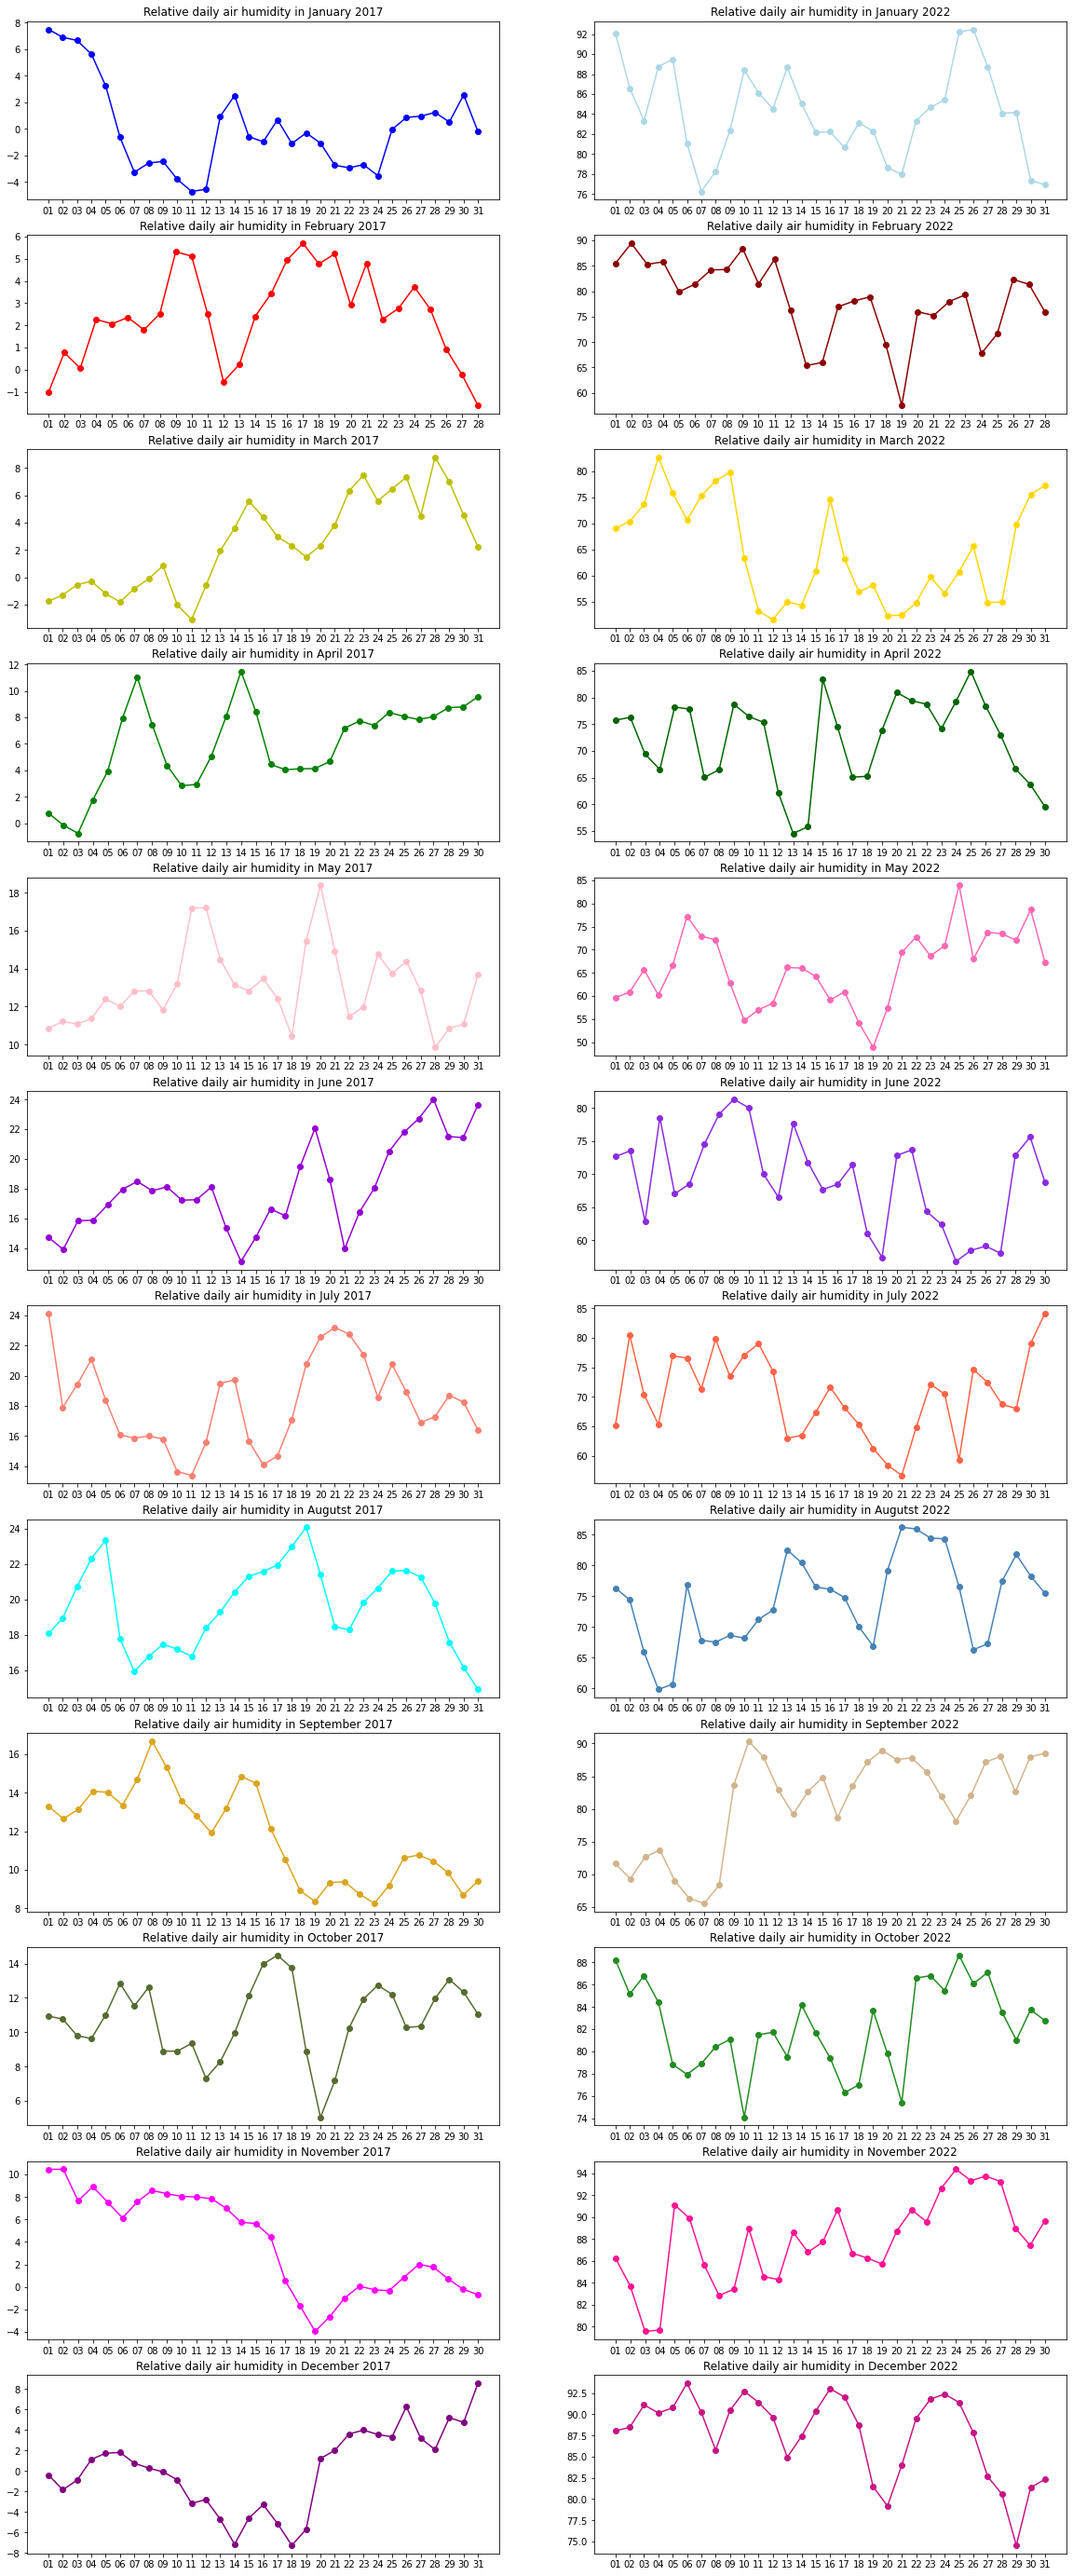

In [30]:
fig, axs = plt.subplots(12,2, figsize=(20, 50))

axs[0,0].plot(E_daily_mean_2017jan, marker='o', linestyle='-', color='b')
axs[0,0].set_xticks(E_daily_mean_2017jan.index, [date.strftime('%d') for date in E_daily_mean_2017jan.index])
axs[0,0].set_title('Relative daily air humidity in January 2017')

axs[1,0].plot(E_daily_mean_2017feb, marker='o', linestyle='-', color='r')
axs[1,0].set_xticks(E_daily_mean_2017feb.index, [date.strftime('%d') for date in E_daily_mean_2017feb.index])
axs[1,0].set_title('Relative daily air humidity in February 2017')

axs[2,0].plot(E_daily_mean_2017mar, marker='o', linestyle='-', color='y')
axs[2,0].set_xticks(E_daily_mean_2017mar.index, [date.strftime('%d') for date in E_daily_mean_2017mar.index])
axs[2,0].set_title('Relative daily air humidity in March 2017')

axs[3,0].plot(E_daily_mean_2017apr, marker='o', linestyle='-', color='g')
axs[3,0].set_xticks(E_daily_mean_2017apr.index, [date.strftime('%d') for date in E_daily_mean_2017apr.index])
axs[3,0].set_title('Relative daily air humidity in April 2017')

axs[4,0].plot(E_daily_mean_2017may, marker='o', linestyle='-', color='pink')
axs[4,0].set_xticks(E_daily_mean_2017may.index, [date.strftime('%d') for date in E_daily_mean_2017may.index])
axs[4,0].set_title('Relative daily air humidity in May 2017')

axs[5,0].plot(E_daily_mean_2017jun, marker='o', linestyle='-', color='darkviolet')
axs[5,0].set_xticks(E_daily_mean_2017jun.index, [date.strftime('%d') for date in E_daily_mean_2017jun.index])
axs[5,0].set_title('Relative daily air humidity in June 2017')

axs[6,0].plot(E_daily_mean_2017jul, marker='o', linestyle='-', color='salmon')
axs[6,0].set_xticks(E_daily_mean_2017jul.index, [date.strftime('%d') for date in E_daily_mean_2017jul.index])
axs[6,0].set_title('Relative daily air humidity in July 2017')

axs[7,0].plot(E_daily_mean_2017aug, marker='o', linestyle='-', color='aqua')
axs[7,0].set_xticks(E_daily_mean_2017aug.index, [date.strftime('%d') for date in E_daily_mean_2017aug.index])
axs[7,0].set_title('Relative daily air humidity in Augutst 2017')

axs[8,0].plot(E_daily_mean_2017sep, marker='o', linestyle='-', color='goldenrod')
axs[8,0].set_xticks(E_daily_mean_2017sep.index, [date.strftime('%d') for date in E_daily_mean_2017sep.index])
axs[8,0].set_title('Relative daily air humidity in September 2017')

axs[9,0].plot(E_daily_mean_2017oct, marker='o', linestyle='-', color='darkolivegreen')
axs[9,0].set_xticks(E_daily_mean_2017oct.index, [date.strftime('%d') for date in E_daily_mean_2017oct.index])
axs[9,0].set_title('Relative daily air humidity in October 2017')

axs[10,0].plot(E_daily_mean_2017nov, marker='o', linestyle='-', color='fuchsia')
axs[10,0].set_xticks(E_daily_mean_2017nov.index, [date.strftime('%d') for date in E_daily_mean_2017nov.index])
axs[10,0].set_title('Relative daily air humidity in November 2017')

axs[11,0].plot(E_daily_mean_2017dec, marker='o', linestyle='-', color='purple')
axs[11,0].set_xticks(E_daily_mean_2017dec.index, [date.strftime('%d') for date in E_daily_mean_2017dec.index])
axs[11,0].set_title('Relative daily air humidity in December 2017')


axs[0,1].plot(E_daily_mean_2022jan, marker='o', linestyle='-', color='lightblue')
axs[0,1].set_xticks(E_daily_mean_2022jan.index, [date.strftime('%d') for date in E_daily_mean_2022jan.index])
axs[0,1].set_title('Relative daily air humidity in January 2022')

axs[1,1].plot(E_daily_mean_2022feb, marker='o', linestyle='-', color='darkred')
axs[1,1].set_xticks(E_daily_mean_2022feb.index, [date.strftime('%d') for date in E_daily_mean_2022feb.index])
axs[1,1].set_title('Relative daily air humidity in February 2022')

axs[2,1].plot(E_daily_mean_2022mar, marker='o', linestyle='-', color='gold')
axs[2,1].set_xticks(E_daily_mean_2022mar.index, [date.strftime('%d') for date in E_daily_mean_2022mar.index])
axs[2,1].set_title('Relative daily air humidity in March 2022')

axs[3,1].plot(E_daily_mean_2022apr, marker='o', linestyle='-', color='darkgreen')
axs[3,1].set_xticks(E_daily_mean_2022apr.index, [date.strftime('%d') for date in E_daily_mean_2022apr.index])
axs[3,1].set_title('Relative daily air humidity in April 2022')

axs[4,1].plot(E_daily_mean_2022may, marker='o', linestyle='-', color='hotpink')
axs[4,1].set_xticks(E_daily_mean_2022may.index, [date.strftime('%d') for date in E_daily_mean_2022may.index])
axs[4,1].set_title('Relative daily air humidity in May 2022')

axs[5,1].plot(E_daily_mean_2022jun, marker='o', linestyle='-', color='blueviolet')
axs[5,1].set_xticks(E_daily_mean_2022jun.index, [date.strftime('%d') for date in E_daily_mean_2022jun.index])
axs[5,1].set_title('Relative daily air humidity in June 2022')

axs[6,1].plot(E_daily_mean_2022jul, marker='o', linestyle='-', color='tomato')
axs[6,1].set_xticks(E_daily_mean_2022jul.index, [date.strftime('%d') for date in E_daily_mean_2022jul.index])
axs[6,1].set_title('Relative daily air humidity in July 2022')

axs[7,1].plot(E_daily_mean_2022aug, marker='o', linestyle='-', color='steelblue')
axs[7,1].set_xticks(E_daily_mean_2022aug.index, [date.strftime('%d') for date in E_daily_mean_2022aug.index])
axs[7,1].set_title('Relative daily air humidity in Augutst 2022')

axs[8,1].plot(E_daily_mean_2022sep, marker='o', linestyle='-', color='tan')
axs[8,1].set_xticks(E_daily_mean_2022sep.index, [date.strftime('%d') for date in E_daily_mean_2022sep.index])
axs[8,1].set_title('Relative daily air humidity in September 2022')

axs[9,1].plot(E_daily_mean_2022oct, marker='o', linestyle='-', color='forestgreen')
axs[9,1].set_xticks(E_daily_mean_2022oct.index, [date.strftime('%d') for date in E_daily_mean_2022oct.index])
axs[9,1].set_title('Relative daily air humidity in October 2022')

axs[10,1].plot(E_daily_mean_2022nov, marker='o', linestyle='-', color='deeppink')
axs[10,1].set_xticks(E_daily_mean_2022nov.index, [date.strftime('%d') for date in E_daily_mean_2022nov.index])
axs[10,1].set_title('Relative daily air humidity in November 2022')

axs[11,1].plot(E_daily_mean_2022dec, marker='o', linestyle='-', color='mediumvioletred')
axs[11,1].set_xticks(E_daily_mean_2022dec.index, [date.strftime('%d') for date in E_daily_mean_2022dec.index])
axs[11,1].set_title('Relative daily air humidity in December 2022')

In [31]:
df

,ID_stacji,Parametr,Data_godzina,Wartość
0,538,A,2022-07-01 00:00:00,16.6
1,538,A,2022-07-01 01:00:00,15.0
2,538,A,2022-07-01 02:00:00,15.2
3,538,A,2022-07-01 03:00:00,13.9
4,538,A,2022-07-01 04:00:00,16.1
...,...,...,...,...
1035968,560,C,2022-06-30 19:00:00,1.5
1035969,560,C,2022-06-30 20:00:00,0.9
1035970,560,C,2022-06-30 21:00:00,1.2
1035971,560,C,2022-06-30 22:00:00,1.6


In [32]:
x = [1,2,4,5,67]
y= [4,6,2,7,1]
np.corrcoef(x, y)
scipy.stats.pearsonr(x, y) 
min_len= min(len(A_without_outliers['Wartość']), len(B_without_outliers['Wartość']),
             len(C_without_outliers['Wartość']), len(D_without_outliers['Wartość']), len(E_without_outliers['Wartość']))
A_short = A_without_outliers['Wartość'][:min_len]
B_short = B_without_outliers['Wartość'][:min_len]
C_short = C_without_outliers['Wartość'][:min_len]
D_short = D_without_outliers['Wartość'][:min_len]
E_short = E_without_outliers['Wartość'][:min_len]

In [33]:
pearson_test_AB = scipy.stats.pearsonr(A_short, B_short) #95% confidence level
pvalue_AB = pearson_test_AB[1]
pearson_test_AC = scipy.stats.pearsonr(A_short, C_short)
pvalue_AC = pearson_test_AC[1]
pearson_test_AD = scipy.stats.pearsonr(A_short, D_short)
pvalue_AD = pearson_test_AD[1]
pearson_test_AE = scipy.stats.pearsonr(A_short, E_short)
pvalue_AE = pearson_test_AE[1]
pearson_test_BC = scipy.stats.pearsonr(C_short, B_short)
pvalue_BC = pearson_test_BC[1]
pearson_test_BD = scipy.stats.pearsonr(D_short, B_short)
pvalue_BD = pearson_test_BD[1]
pearson_test_BE = scipy.stats.pearsonr(E_short, B_short)
pvalue_BE = pearson_test_BE[1]
pearson_test_CD = scipy.stats.pearsonr(C_short, D_short)
pvalue_CD = pearson_test_CD[1]
pearson_test_CE = scipy.stats.pearsonr(C_short, E_short)
pvalue_CE = pearson_test_CE[1]
pearson_test_DE = scipy.stats.pearsonr(D_short, E_short)
pvalue_DE = pearson_test_DE[1]

print('''Correlation coefficient Pearson test:\n\nA and B p-value is: {},\nA and C p-value is: {},\nA and D p-value is: {},\nA and E p-value is: {},
B and C p-value is: {},\nB and D p-value is: {},\nB and E p-value is: {}, 
C and D p-value is: {},\nC and E p-value is: {},\nD and E p-value is: {}.'''.format(pvalue_AB, pvalue_AC,pvalue_AD, pvalue_AE, pvalue_BC, pvalue_BD, pvalue_BE, pvalue_CD, pvalue_CE, pvalue_DE))

Correlation coefficient Pearson test:

A and B p-value is: 9.073960012087252e-182,
A and C p-value is: 0.09535280057268909,
A and D p-value is: 0.0014119973218392845,
A and E p-value is: 0.8455807865665776,
B and C p-value is: 3.137832280174161e-16,
B and D p-value is: 7.908702666795886e-06,
B and E p-value is: 8.884379835172429e-45, 
C and D p-value is: 0.7436783961471836,
C and E p-value is: 2.6669803501699052e-39,
D and E p-value is: 0.6376132328521781.


In [34]:
print("""P-value is greater than 0.05 (alpha coefficient) in A and C test, A and E test, C and D test, D and E test. 
        This means that these variables have a significant influence on each other.""")

P-value is greater than 0.05 (alpha coefficient) in A and C test, A and E test, C and D test, D and E test. 
        This means that these variables have a significant influence on each other.


In [35]:
df_m = df
df_m['Month'] = df_m['Data_godzina'].dt.month
df_m = df[df['Parametr'] == 'E']
df_ml = df_m
df_ml['Anomaly'] = ((df_ml['Wartość'] > E_upper_whisker) & (df_ml['Wartość'] > E_lower_whisker)) | ((df_ml['Wartość'] < E_upper_whisker) & (df_ml['Wartość'] < E_lower_whisker)) # Kolumna oznaczająca anomalie
df_ml['Anomaly'] = df_ml['Anomaly'].astype(int)
total_anomaly = df_ml['Anomaly'].sum()
print("Percentage of anomalies in this data frame:", 100*total_anomaly/df_ml.shape[0], "%")

Percentage of anomalies in this data frame: 0.5031004132764768 %


In [36]:
#RandomForestClassifier
df_ml['Parametr'] = df_ml['Parametr'].replace({'E': 1})
features = ['ID_stacji', 'Parametr', 'Month', 'Wartość']
target = 'Anomaly'
train_data, test_data, train_labels, test_labels = train_test_split(df_ml[features], df_ml[target], test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)

In [37]:
model.fit(train_data, train_labels)

RandomForestClassifier(random_state=42)

In [38]:
predictions = model.predict(test_data)

In [39]:
print("Accuracy:", accuracy_score(test_labels, predictions))
print("\nClassification Report:\n", classification_report(test_labels, predictions))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    829397
           1       1.00      1.00      1.00      4234

    accuracy                           1.00    833631
   macro avg       1.00      1.00      1.00    833631
weighted avg       1.00      1.00      1.00    833631



In [40]:
#RandomForestRegressor
train_data, test_data, train_labels, test_labels = train_test_split(df_ml[features], df_ml[target], test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
mse = mean_squared_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0
R^2 Score: 1.0


In [41]:
#LinearRegression
model = LinearRegression()
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
mse = mean_squared_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.004817421713256817
R^2 Score: 0.04665725826314415


In [44]:
#RidgeClassifier
numeric_features = ['ID_stacji', 'Parametr', 'Month', 'Wartość']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha=0.001))
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
mse = mean_squared_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.005078985786277142
R^2 Score: -0.005104913569737857


In [45]:
#SVC - SupportVectorClassifier
numeric_features = ['ID_stacji', 'Parametr', 'Month', 'Wartość']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(kernel='linear', random_state=42,C=1))])
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
classification_report_result = classification_report(test_labels, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.9999868047133564

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    829397
           1       1.00      1.00      1.00      4234

    accuracy                           1.00    833631
   macro avg       1.00      1.00      1.00    833631
weighted avg       1.00      1.00      1.00    833631



In [47]:
#SVC - SupportVectorClassifier
numeric_features = ['ID_stacji', 'Parametr', 'Month', 'Wartość']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(kernel='linear', random_state=42,C=0.1))])
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
classification_report_result = classification_report(test_labels, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.9999172295655991

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    829397
           1       1.00      0.98      0.99      4234

    accuracy                           1.00    833631
   macro avg       1.00      0.99      1.00    833631
weighted avg       1.00      1.00      1.00    833631



In [ ]:
# A_mean = []
# for i in range(max_id):
#     x = get_station_specific_measurments(df, i, 'A')
#     x_mean = x['Wartość'].mean()
#     A_mean.append(x_mean)
    
# B_mean = []
# for i in range(max_id):
#     x = get_station_specific_measurments(df, i, 'B')
#     x_mean = x['Wartość'].mean()
#     B_mean.append(x_mean)